# 07/29/2024
Fiona Zheng

In [1]:
import pandas as pd
import numpy as np
import holidays
import warnings
from datetime import datetime
import matplotlib.dates as mdates
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv(r'data/load_scada_actual.csv')
print(df.columns)

Index(['load_name', 'timestamp', 'lmp', 'tag_actual', 'tag_scheduled',
       'netload', 'netload_source', 'gross_load', 'date_local', 'he_local',
       'tz', 'lastest_update_utc'],
      dtype='object')


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215824 entries, 0 to 215823
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   load_name           215824 non-null  object 
 1   timestamp           215824 non-null  object 
 2   lmp                 22317 non-null   float64
 3   tag_actual          22355 non-null   float64
 4   tag_scheduled       2 non-null       float64
 5   netload             209132 non-null  float64
 6   netload_source      209132 non-null  object 
 7   gross_load          46078 non-null   float64
 8   date_local          215824 non-null  object 
 9   he_local            215824 non-null  int64  
 10  tz                  215824 non-null  object 
 11  lastest_update_utc  209132 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 19.8+ MB


In [19]:
df.drop(columns = ['lmp', 'tag_actual', 'tag_scheduled', 'netload', 'netload_source', 'date_local', 'he_local', 'tz', 'lastest_update_utc'], inplace = True)
df.rename(columns = {'hour_begins': 'hour_begins'}, inplace = True)
df

,load_name,timestamp,gross_load
0,KCEC,2024-07-30 19:00:00+00:00,NaN
1,KCEC,2024-07-30 20:00:00+00:00,NaN
2,KCEC,2024-07-30 21:00:00+00:00,NaN
3,KCEC,2024-07-31 01:00:00+00:00,NaN
4,KCEC,2024-07-31 02:00:00+00:00,NaN
...,...,...,...
215819,KCEC,2020-04-14 05:00:00+00:00,NaN
215820,KCEC,2019-11-21 06:00:00+00:00,NaN
215821,KCEC,2019-11-20 06:00:00+00:00,NaN
215822,KCEC,2019-11-06 06:00:00+00:00,NaN


In [20]:
df.load_name.value_counts()

load_name
HCE            46679
KCEC           44524
JICARILLA      44135
ACOMA          27393
RATON          25131
DMEA           21270
AZTEC           2698
UNITED PSCO     2009
UNITED WACM     1985
Name: count, dtype: int64

In [21]:
# non_null_values_count  = df[~df['actual_gross_load'].isna()].groupby('load_name').size()
# most_non_null_value_group = non_null_values_count.idxmax()
# print(most_non_null_value_group)
# df = df[df['load_name'] == most_non_null_value_group]

df = df[df['load_name'] == 'DMEA']
df.drop(columns = ['load_name'], inplace = True)
# actual gross load is empty for HCE

In [22]:
df

,timestamp,gross_load
47,2024-07-30 19:00:00+00:00,83.172017
48,2024-07-30 20:00:00+00:00,82.522983
49,2024-07-30 21:00:00+00:00,93.267317
50,2024-07-30 22:00:00+00:00,100.338150
51,2024-07-30 23:00:00+00:00,92.407567
...,...,...
209662,2024-07-26 05:00:00+00:00,66.277650
209663,2024-07-27 05:00:00+00:00,65.818617
209664,2024-07-28 05:00:00+00:00,64.141883
209665,2024-07-29 05:00:00+00:00,59.904300


In [23]:
df = df.dropna()
print(len(df))

21270


In [24]:
# sort by hour_begins
df.rename(columns = {'timestamp': 'hour_begins'}, inplace = True)
df['hour_begins'] = pd.to_datetime(df['hour_begins'])
df = df.sort_values(by = 'hour_begins')
# split hour_begins into month hour_begins and time
df['year'] = df['hour_begins'].dt.year
df['month'] = df['hour_begins'].dt.month
df['season'] = ['winter' if x in [12, 1, 2] else 'spring' if x in [3, 4, 5] else 'summer' if x in [6, 7, 8] else 'fall' for x in df['month']]
df['day'] = df['hour_begins'].dt.day
df['hour'] = df['hour_begins'].dt.hour
df['dow'] = df['hour_begins'].dt.dayofweek # 0 means monday

In [25]:
print(df.columns)
df

Index(['hour_begins', 'gross_load', 'year', 'month', 'season', 'day', 'hour',
       'dow'],
      dtype='object')


,hour_begins,gross_load,year,month,season,day,hour,dow
109752,2021-10-21 18:00:00+00:00,58.728000,2021,10,fall,21,18,3
118748,2021-10-21 19:00:00+00:00,62.769083,2021,10,fall,21,19,3
127745,2021-10-21 20:00:00+00:00,62.078933,2021,10,fall,21,20,3
136749,2021-10-21 21:00:00+00:00,63.153767,2021,10,fall,21,21,3
145759,2021-10-21 22:00:00+00:00,65.232000,2021,10,fall,21,22,3
...,...,...,...,...,...,...,...,...
59,2024-07-31 07:00:00+00:00,55.465217,2024,7,summer,31,7,2
60,2024-07-31 08:00:00+00:00,54.373650,2024,7,summer,31,8,2
61,2024-07-31 09:00:00+00:00,50.037567,2024,7,summer,31,9,2
62,2024-07-31 10:00:00+00:00,51.308583,2024,7,summer,31,10,2


## Adding weather data

In [26]:
weather_df = pd.read_csv(r'data/DMEA_weather_data.csv')
weather_df

,index,temperature,solar_radiation,cloud_cover,humidity,wind_speed
0,2015-01-01 00:00:00+00:00,18.579321,0.0,30.915419,0.000000,2.423029
1,2015-01-01 01:00:00+00:00,15.854053,0.0,3.262689,0.000000,2.458667
2,2015-01-01 02:00:00+00:00,13.142407,0.0,1.875000,0.000000,2.116607
3,2015-01-01 03:00:00+00:00,12.213239,0.0,5.447345,0.000000,3.115575
4,2015-01-01 04:00:00+00:00,12.233124,0.0,41.087280,0.000000,1.917479
...,...,...,...,...,...,...
81798,2024-07-31 08:00:00+00:00,66.751624,0.0,0.000000,16.093412,4.421155
81799,2024-07-31 09:00:00+00:00,65.298682,0.0,0.000000,16.953800,3.711957
81800,2024-07-31 10:00:00+00:00,62.027557,0.0,0.000000,21.734526,3.720699
81801,2024-07-31 11:00:00+00:00,59.840289,0.0,0.000000,23.930729,3.353332


In [27]:

weather_df['hour_begins'] = pd.to_datetime(weather_df['index'])
weather_df = weather_df.sort_values(by = 'hour_begins')
# merge weather data with df
df = pd.merge(df, weather_df, on = 'hour_begins', how = 'left')
#drop index column
df.drop(columns = ['index'], inplace = True)
df

,hour_begins,gross_load,year,month,season,day,hour,dow,temperature,solar_radiation,cloud_cover,humidity,wind_speed
0,2021-10-21 18:00:00+00:00,58.728000,2021,10,fall,21,18,3,53.693549,656.685242,67.000000,32.073475,1.991841
1,2021-10-21 19:00:00+00:00,62.769083,2021,10,fall,21,19,3,57.486029,710.514648,11.611272,30.586985,1.543698
2,2021-10-21 20:00:00+00:00,62.078933,2021,10,fall,21,20,3,60.400208,622.538208,59.856133,26.052521,1.782106
3,2021-10-21 21:00:00+00:00,63.153767,2021,10,fall,21,21,3,62.212457,577.231445,2.051746,21.712488,2.218037
4,2021-10-21 22:00:00+00:00,65.232000,2021,10,fall,21,22,3,62.565063,421.572235,0.000000,19.294811,2.095834
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21265,2024-07-31 07:00:00+00:00,55.465217,2024,7,summer,31,7,2,68.434839,0.000000,0.000000,16.169823,4.481148
21266,2024-07-31 08:00:00+00:00,54.373650,2024,7,summer,31,8,2,66.751624,0.000000,0.000000,16.093412,4.421155
21267,2024-07-31 09:00:00+00:00,50.037567,2024,7,summer,31,9,2,65.298682,0.000000,0.000000,16.953800,3.711957
21268,2024-07-31 10:00:00+00:00,51.308583,2024,7,summer,31,10,2,62.027557,0.000000,0.000000,21.734526,3.720699


# EDA

In [28]:
# turn the utc time to mountain time
df['hour_begins'] = df['hour_begins'].dt.tz_convert('US/Mountain')
# print out the time zone of the hour_begins
print(f'Time zone of the hour_begins: {df["hour_begins"].dt.tz}')
df

Time zone of the hour_begins: US/Mountain


,hour_begins,gross_load,year,month,season,day,hour,dow,temperature,solar_radiation,cloud_cover,humidity,wind_speed
0,2021-10-21 12:00:00-06:00,58.728000,2021,10,fall,21,18,3,53.693549,656.685242,67.000000,32.073475,1.991841
1,2021-10-21 13:00:00-06:00,62.769083,2021,10,fall,21,19,3,57.486029,710.514648,11.611272,30.586985,1.543698
2,2021-10-21 14:00:00-06:00,62.078933,2021,10,fall,21,20,3,60.400208,622.538208,59.856133,26.052521,1.782106
3,2021-10-21 15:00:00-06:00,63.153767,2021,10,fall,21,21,3,62.212457,577.231445,2.051746,21.712488,2.218037
4,2021-10-21 16:00:00-06:00,65.232000,2021,10,fall,21,22,3,62.565063,421.572235,0.000000,19.294811,2.095834
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21265,2024-07-31 01:00:00-06:00,55.465217,2024,7,summer,31,7,2,68.434839,0.000000,0.000000,16.169823,4.481148
21266,2024-07-31 02:00:00-06:00,54.373650,2024,7,summer,31,8,2,66.751624,0.000000,0.000000,16.093412,4.421155
21267,2024-07-31 03:00:00-06:00,50.037567,2024,7,summer,31,9,2,65.298682,0.000000,0.000000,16.953800,3.711957
21268,2024-07-31 04:00:00-06:00,51.308583,2024,7,summer,31,10,2,62.027557,0.000000,0.000000,21.734526,3.720699


In [29]:
df.describe()

,gross_load,year,month,day,hour,dow,temperature,solar_radiation,cloud_cover,humidity,wind_speed
count,21270.000000,21270.000000,21270.000000,21270.000000,21270.000000,21270.000000,21080.000000,21080.000000,21080.000000,21080.000000,21080.000000
mean,71.415080,2022.856041,6.167936,15.814151,11.498213,2.999060,51.676603,215.102238,31.045525,44.155939,2.856401
std,17.376217,0.790393,3.387424,9.042157,6.930237,1.995811,24.976445,311.713491,40.947195,22.257775,1.704189
min,0.387917,2021.000000,1.000000,1.000000,0.000000,0.000000,-459.400000,0.000000,0.000000,0.000000,0.000000
25%,56.964921,2022.000000,3.000000,8.000000,5.000000,1.000000,35.254755,0.000000,0.000000,25.619880,1.739419
50%,70.474217,2023.000000,6.000000,16.000000,11.000000,3.000000,50.103024,0.000000,2.547412,42.610350,2.617153
75%,85.027404,2023.000000,9.000000,24.000000,18.000000,5.000000,66.894968,395.210297,73.662273,61.035764,3.491418
max,122.336500,2024.000000,12.000000,31.000000,23.000000,6.000000,1090.016852,1090.493042,200.000000,165.550156,14.999789


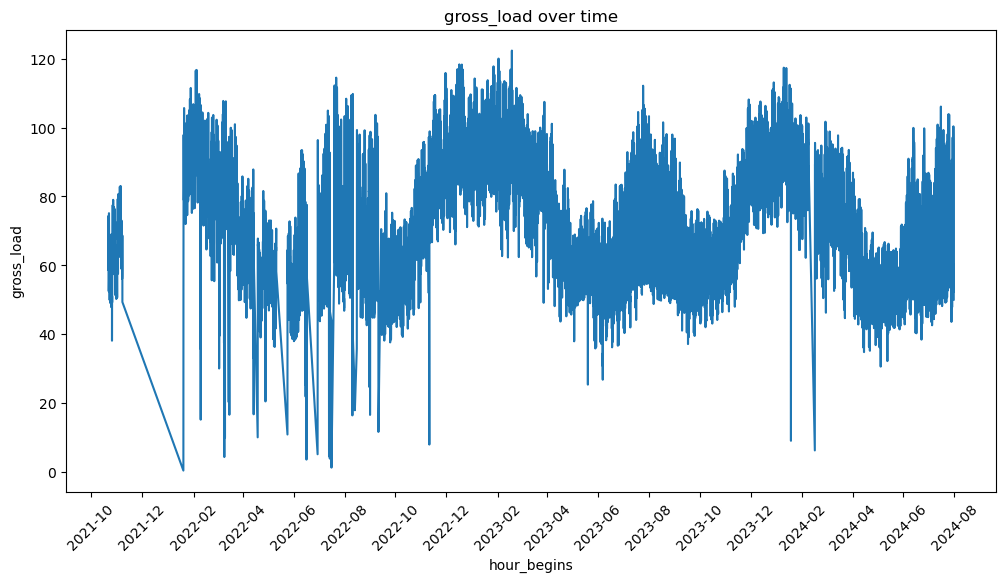

In [43]:
import matplotlib.pyplot as plt

# basic plots for actual_gross_load with x being hour_begins
plt.figure(figsize=(12, 6))
plt.plot(df['hour_begins'], df['gross_load'])
plt.title('gross_load over time')
plt.xlabel('hour_begins')
plt.ylabel('gross_load')
# with date and rotate
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # set to show every 3 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.show()

In [31]:
# start and end date
print(df['hour_begins'].min())
print(df['hour_begins'].max())

2021-10-21 12:00:00-06:00
2024-07-31 05:00:00-06:00


## Data preprocessing

In [38]:
# feature engineering
df['month_sin'] = np.sin((df['month'] - 1) * (2. * np.pi / 12))
df['month_cos'] = np.cos((df['month'] - 1) * (2. * np.pi / 12))
df['day_sin'] = np.sin((df['day'] - 1) * (2. * np.pi / 31))
df['day_cos'] = np.cos((df['day'] - 1) * (2. * np.pi / 31))
df['hour_sin'] = np.sin(df['hour'] * (2. * np.pi / 24))
df['hour_cos'] = np.cos(df['hour'] * (2. * np.pi / 24))
df['dow_sin'] = np.sin(df['dow'] * (2. * np.pi / 7))
df['dow_cos'] = np.cos(df['dow'] * (2. * np.pi / 7))

# holiday feature
us_holidays = holidays.US()
df['is_holiday'] = df['hour_begins'].apply(lambda x: x in us_holidays)
df['is_holiday'] = df['is_holiday'].astype(int)

In [39]:

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the season function to the DataFrame
df['season'] = df['month'].apply(get_season)

Fall - Lower bound: 41.14, Upper bound: 103.16
Winter - Lower bound: 63.41, Upper bound: 112.83
Spring - Lower bound: 37.82, Upper bound: 98.94
Summer - Lower bound: 38.38, Upper bound: 104.33


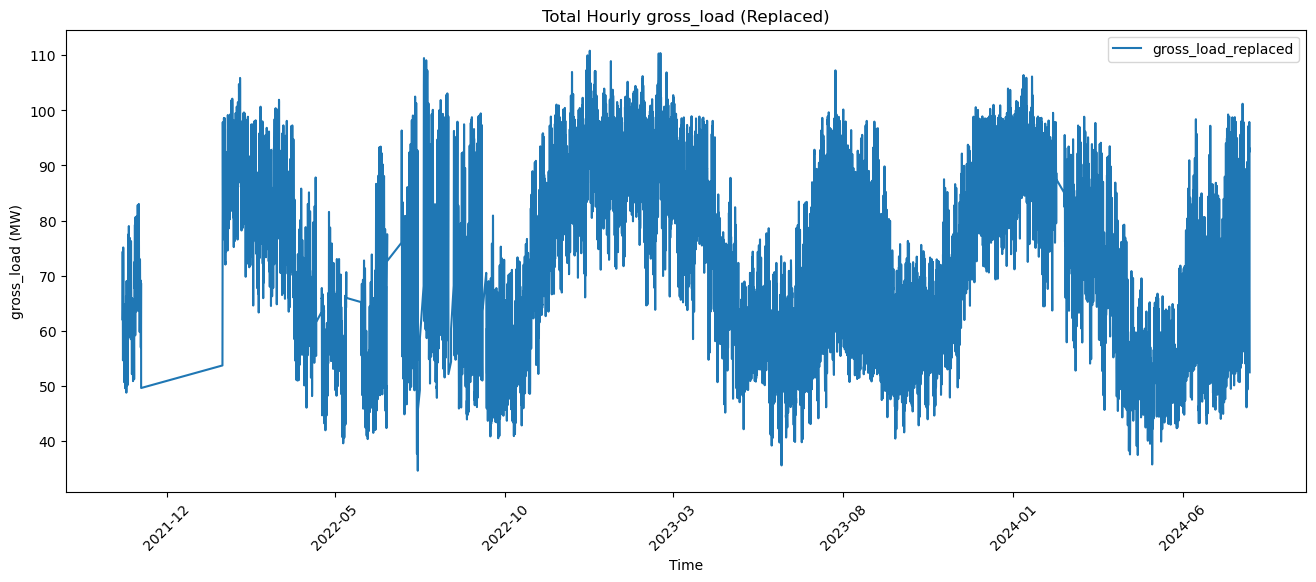

In [40]:
# Function to replace outliers within each season
def replace_outliers_with_avg_seasonal(df):
    df['gross_load_replaced'] = df['gross_load']
    for season in df['season'].unique():
        season_data = df[df['season'] == season]['gross_load']
        lower_bound = season_data.quantile(0.01)
        upper_bound = season_data.quantile(0.99)
        print(f'{season} - Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}')
        
        outliers = (df['gross_load'] < lower_bound) | (df['gross_load'] > upper_bound) | (df['gross_load'] == 0) | (df['gross_load'] == np.nan) 
        
        # Remove continuous zeros or NaNs at the end
        while pd.isna(df.iloc[-1]['gross_load_replaced']) or df.iloc[-1]['gross_load_replaced'] == 0:
            df = df.iloc[:-1]

        for idx in df[outliers].index:
            if idx == 0 or idx == len(df) - 1:
                # directly drop the first and last value
                df.at[idx, 'gross_load_replaced'] = np.nan
                continue
            # Handle edge cases where previous or next value might be NaN or zero
            prev_idx = idx - 1
            next_idx = idx + 1
            # debug
            # print(f'idx: {idx}, prev_idx: {prev_idx}, next_idx: {next_idx}')
            while prev_idx >= 0 and (pd.isna(df.iloc[prev_idx]['gross_load_replaced']) or df.iloc[prev_idx]['gross_load_replaced'] == 0):
                prev_idx -= 1
            while next_idx < len(df) and (pd.isna(df.iloc[next_idx]['gross_load_replaced']) or df.iloc[next_idx]['gross_load_replaced'] == 0):
                next_idx += 1
            
            if prev_idx >= 0 and next_idx < len(df):
                prev_val = df.iloc[prev_idx]['gross_load_replaced']
                next_val = df.iloc[next_idx]['gross_load_replaced']
                df.at[idx, 'gross_load_replaced'] = (prev_val + next_val) / 2
            elif prev_idx >= 0:
                df.at[idx, 'gross_load_replaced'] = df.iloc[prev_idx]['gross_load_replaced']
            elif next_idx < len(df):
                df.at[idx, 'gross_load_replaced'] = df.iloc[next_idx]['gross_load_replaced']

    return df

# reset index
df.reset_index(drop=True, inplace=True)
df = replace_outliers_with_avg_seasonal(df)

plt.figure(figsize=(16, 6))
plt.plot(df['hour_begins'], df['gross_load_replaced'], label='gross_load_replaced')
plt.xlabel('Time')
plt.ylabel('gross_load (MW)')
plt.title('Total Hourly gross_load (Replaced)')
plt.legend()

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.show()

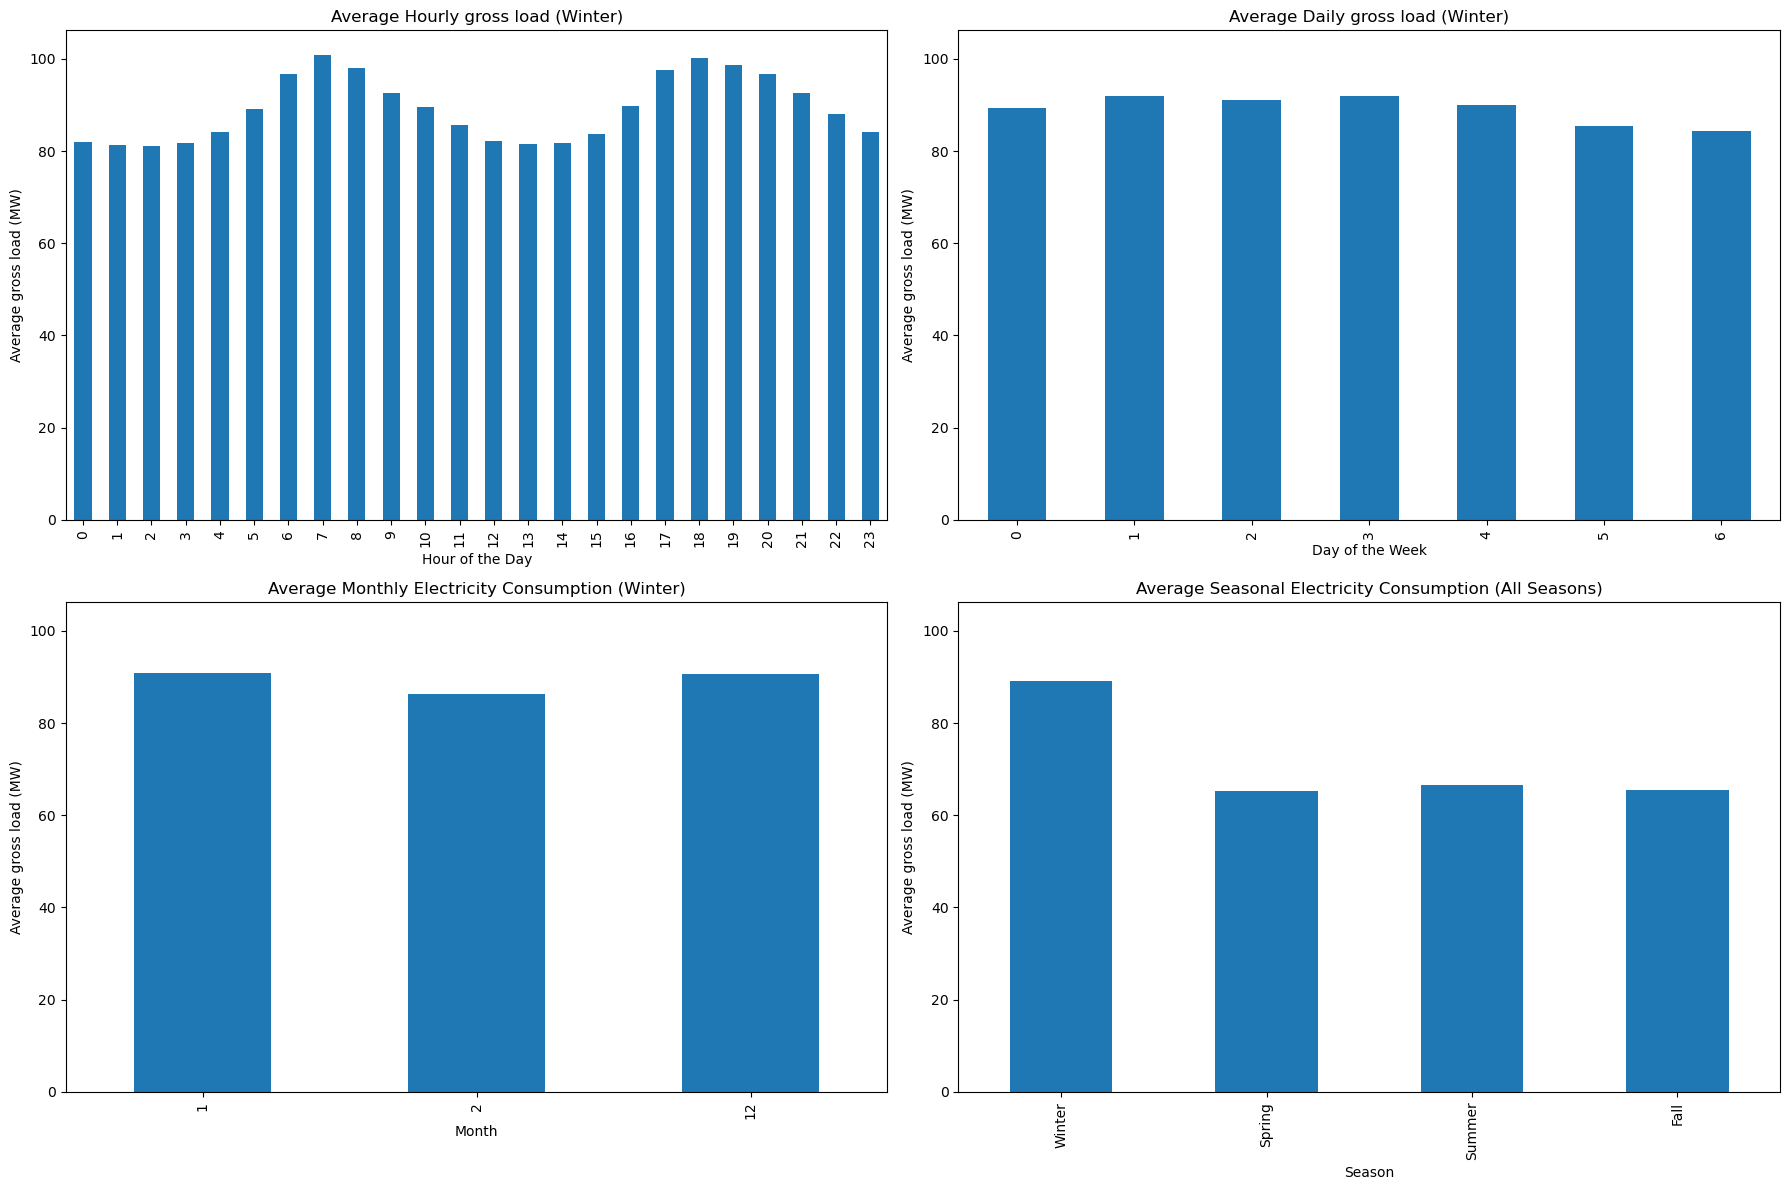

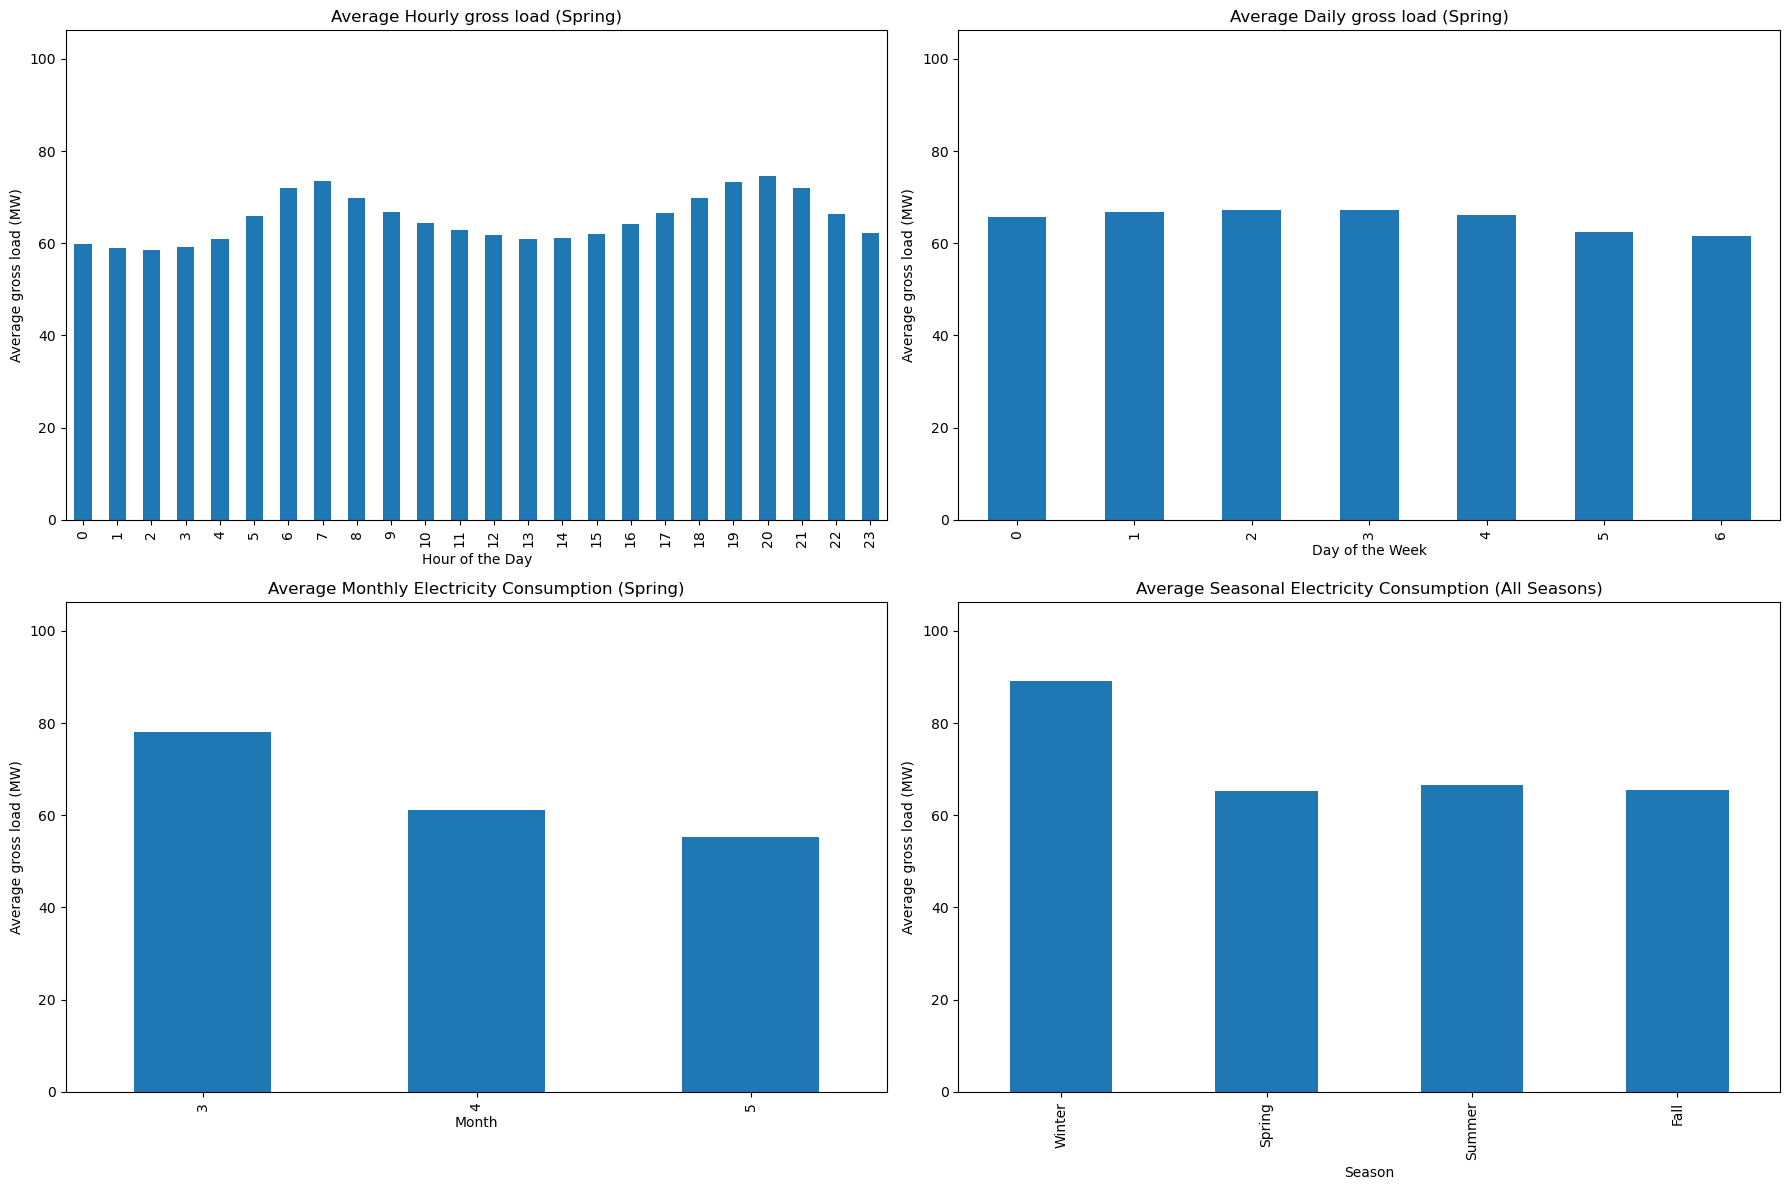

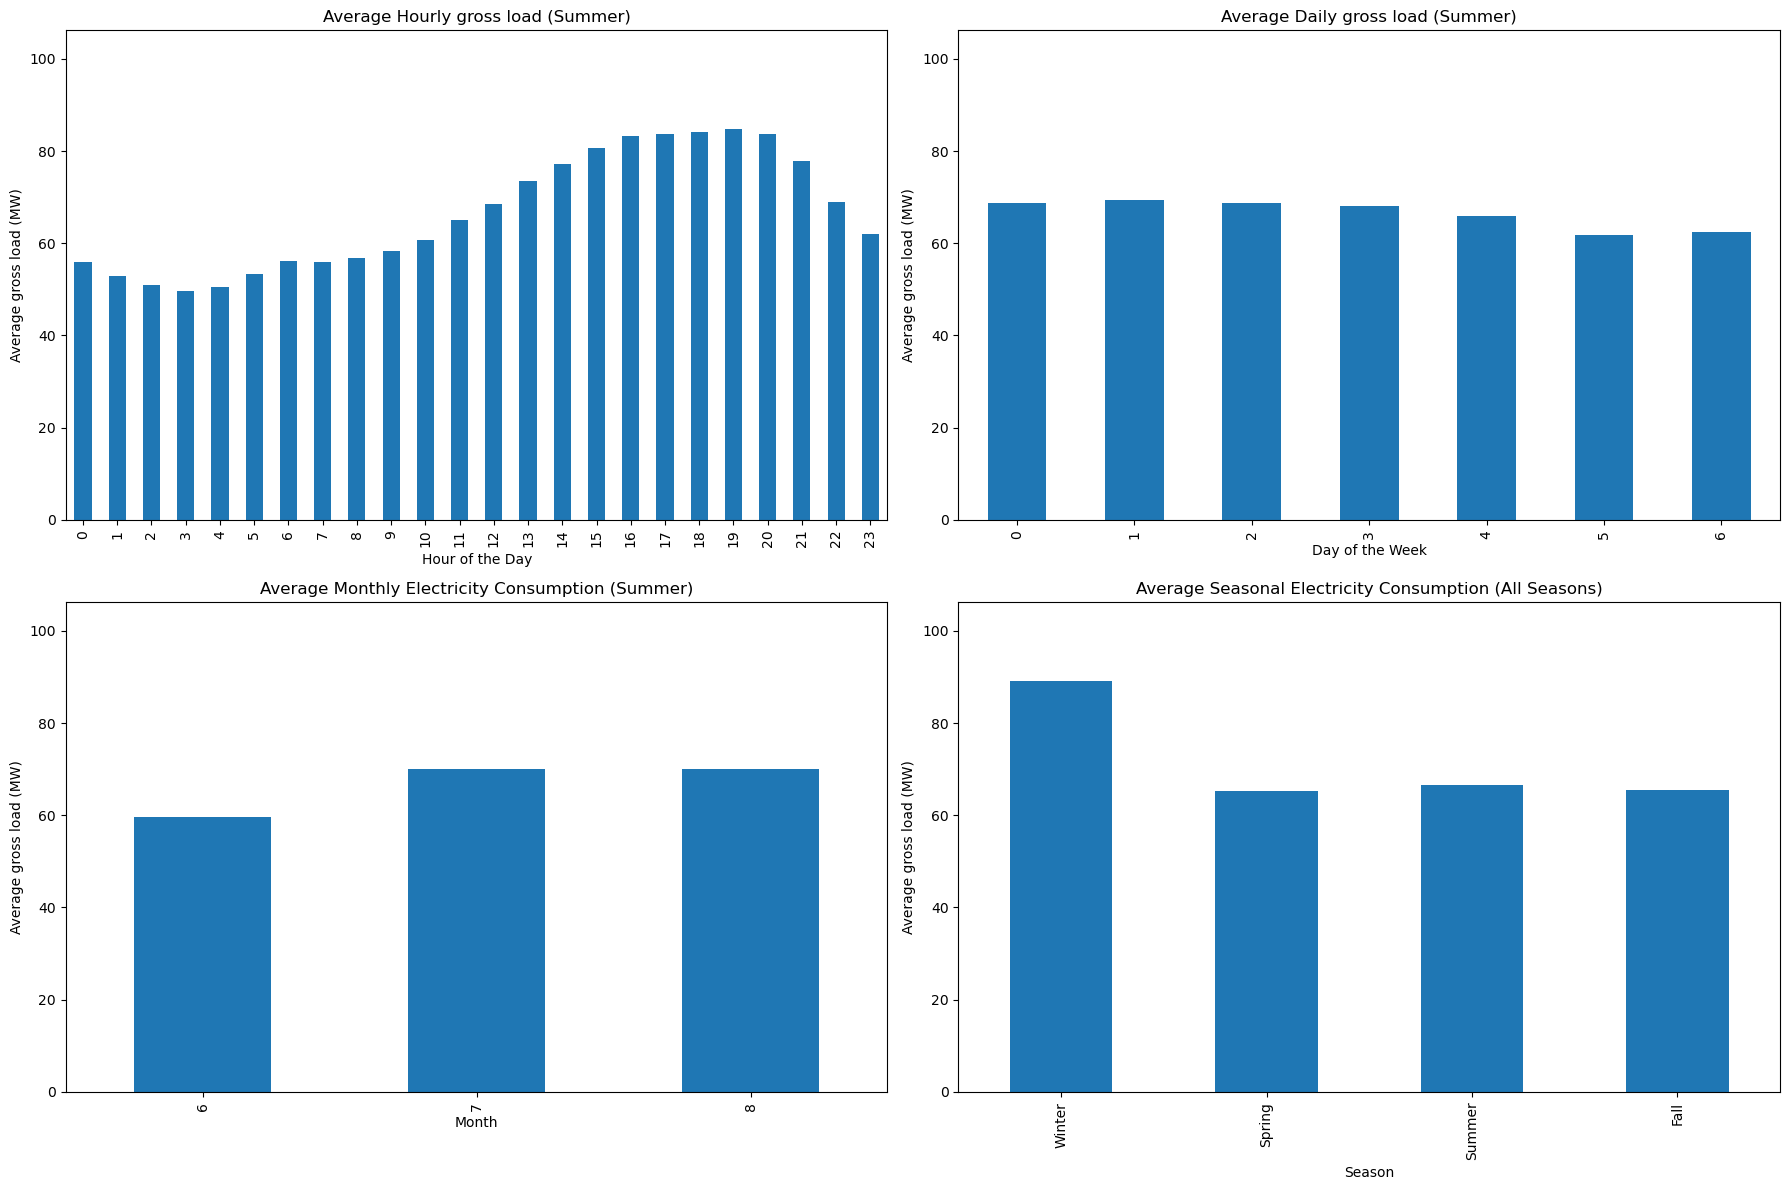

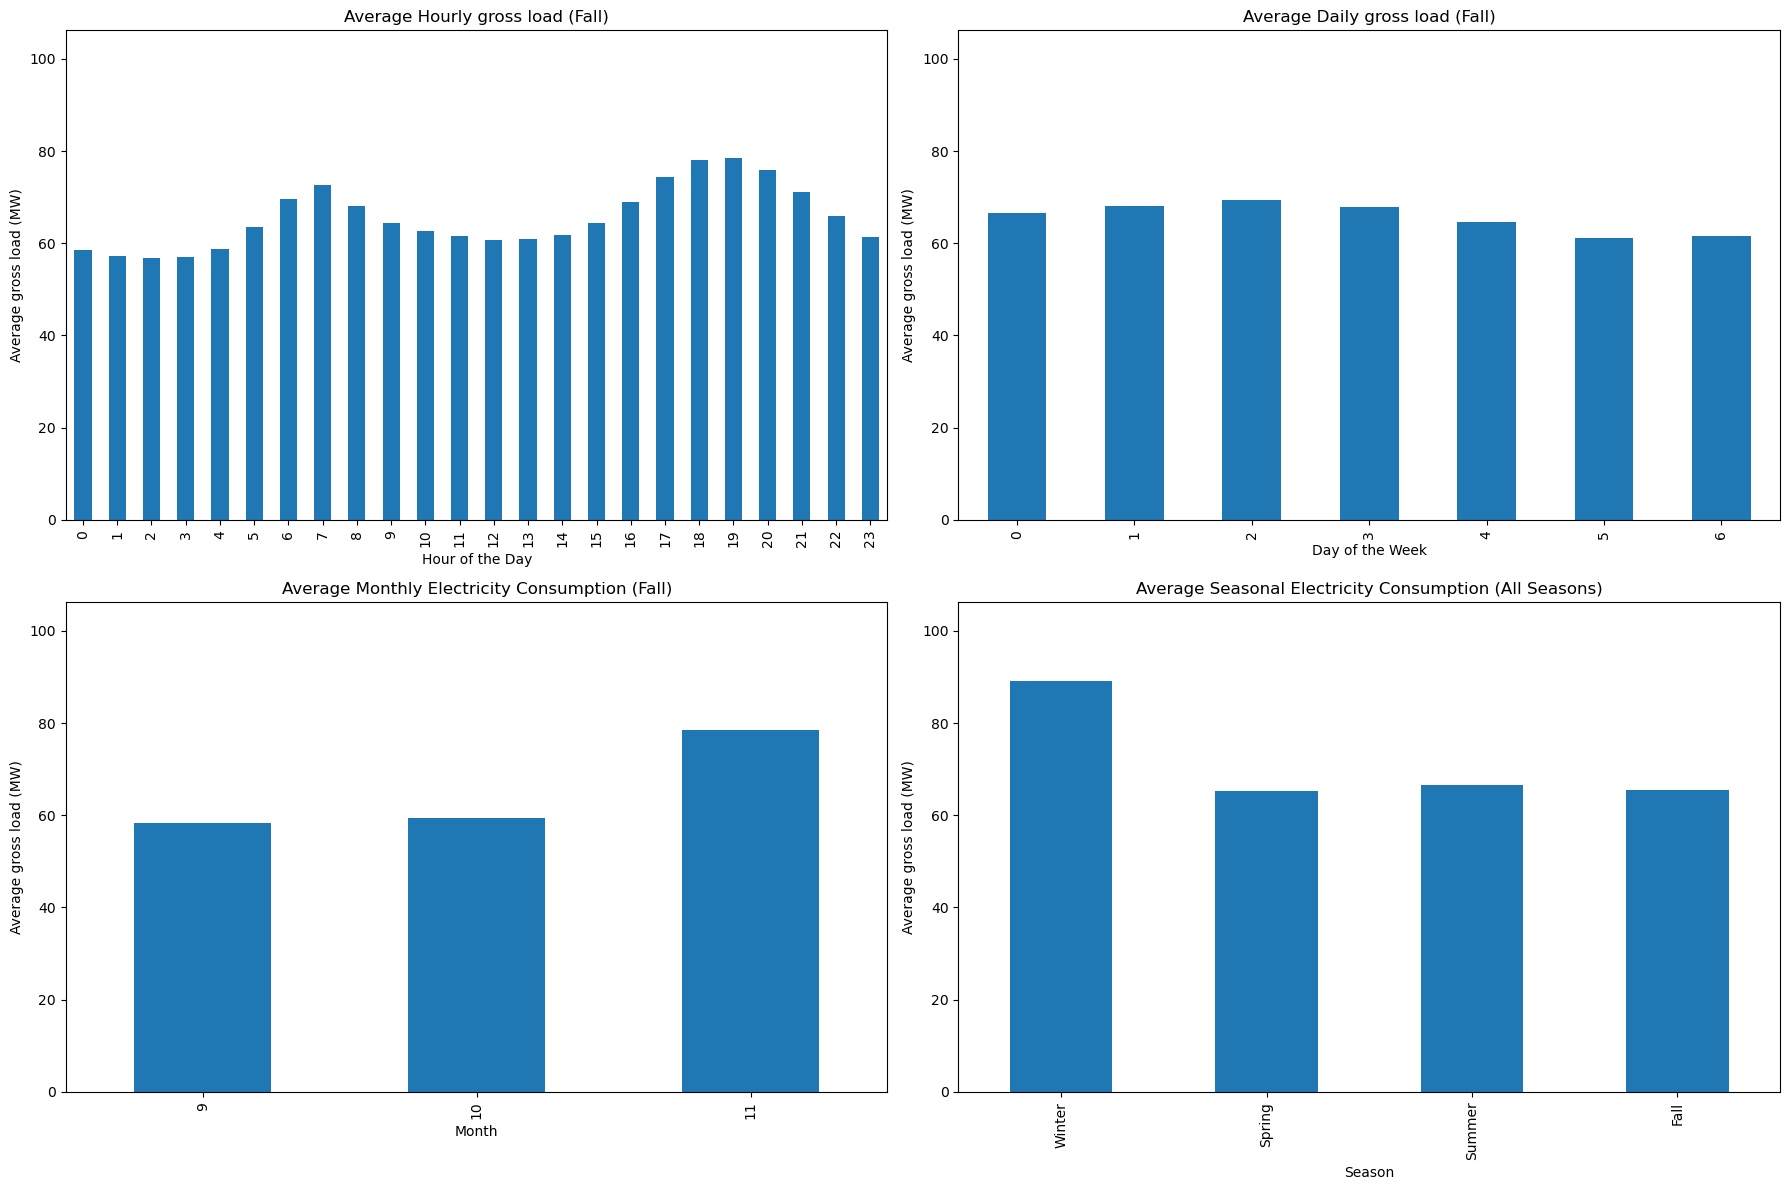

In [41]:
def plot_data(df):
    df = df.sort_values(by='hour_begins')

    # Ensure necessary time features are added
    df['hour'] = df['hour_begins'].dt.hour
    df['day_of_week'] = df['hour_begins'].dt.dayofweek
    df['month'] = df['hour_begins'].dt.month

    # Define seasons
    df['season'] = df['hour_begins'].dt.month % 12 // 3 + 1
    season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
    df['season'] = df['season'].map(season_mapping)

    # Calculate seasonal consumption for all seasons
    season_consumption = df.groupby('season')['gross_load'].mean().reindex(season_mapping.values())

    # Function to plot data for a given season
    def plot_season_data(season_df, season_name, season_consumption, axs, y_limit):
        # Plot by hour of the day
        hourly_consumption = season_df.groupby('hour')['gross_load'].mean()
        hourly_consumption.plot(kind='bar', ax=axs[0, 0])
        axs[0, 0].set_xlabel('Hour of the Day')
        axs[0, 0].set_ylabel('Average gross load (MW)')
        axs[0, 0].set_title(f'Average Hourly gross load ({season_name})')
        axs[0, 0].set_ylim(0, y_limit)

        # Plot by day of the week
        daily_consumption = season_df.groupby('day_of_week')['gross_load'].mean()
        daily_consumption.plot(kind='bar', ax=axs[0, 1])
        axs[0, 1].set_xlabel('Day of the Week')
        axs[0, 1].set_ylabel('Average gross load (MW)')
        axs[0, 1].set_title(f'Average Daily gross load ({season_name})')
        axs[0, 1].set_ylim(0, y_limit)

        # Plot by month within the season
        monthly_consumption = season_df.groupby('month')['gross_load'].mean()
        monthly_consumption.plot(kind='bar', ax=axs[1, 0])
        axs[1, 0].set_xlabel('Month')
        axs[1, 0].set_ylabel('Average gross load (MW)')
        axs[1, 0].set_title(f'Average Monthly Electricity Consumption ({season_name})')
        axs[1, 0].set_ylim(0, y_limit)

        # Plot seasonal consumption for all seasons
        season_consumption.plot(kind='bar', ax=axs[1, 1])
        axs[1, 1].set_xlabel('Season')
        axs[1, 1].set_ylabel('Average gross load (MW)')
        axs[1, 1].set_title('Average Seasonal Electricity Consumption (All Seasons)')
        axs[1, 1].set_ylim(0, y_limit)

    # find out the y limit as the max average value of the gross load
    y_limit = df['gross_load'].mean() + 2 * df['gross_load'].std()


    # Plot for each season
    for season, season_name in season_mapping.items():
        season_df = df[df['season'] == season_name]
        if not season_df.empty:
            fig, axs = plt.subplots(2, 2, figsize=(18, 12))
            plot_season_data(season_df, season_name, season_consumption, axs, y_limit)
            plt.tight_layout()
            plt.show()
        else:
            print(f"No data available for {season_name}")


df['hour_begins'] = pd.to_datetime(df['hour_begins'].dt.tz_convert('US/Mountain'))
plot_data(df)

In [37]:
# df_merged drop nan
df_merged.dropna(inplace=True)
print(df_merged.columns)
print(len(df_merged))
# time stamp min and max
print(df_merged['hour_begins'].min())
print(df_merged['hour_begins'].max())

Index(['hour_begins', 'gross_load', 'year', 'month', 'season', 'day', 'hour',
       'dow', 'temperature', 'solar_radiation', 'cloud_cover', 'humidity',
       'wind_speed', 'month_sin', 'month_cos', 'gross_load_replaced',
       'hour_begins_3d', 'gross_load_replaced_3d'],
      dtype='object')
20369
2021-10-24 13:00:00-06:00
2024-07-31 04:00:00-06:00


In [167]:
# Normalize the data and convert to time series data
from sklearn.preprocessing import MinMaxScaler

df['hour_begins'] = pd.to_datetime(df['hour_begins']).dt.tz_convert('US/Mountain')
df_merged = df_merged.sort_values(by = 'hour_begins')
# features and target
df_model = df_merged[['gross_load_replaced', 'gross_load_replaced_3d', 'month_sin', 'month_cos',
       'hour_sin', 'hour_cos', 'dow_sin', 'dow_cos', 'temperature', 'solar_radiation', 'cloud_cover', 'humidity',
       'wind_speed']]


features = ['gross_load_replaced_3d', 'month_sin', 'month_cos', 'hour_sin', 'hour_cos', 'dow_sin', 'dow_cos', 'temperature', 'solar_radiation', 'cloud_cover', 'humidity','wind_speed']
features_to_scale = ['gross_load_replaced_3d', 'month_sin', 'month_cos', 'hour_sin', 'hour_cos', 'dow_sin', 'dow_cos', 'temperature', 'solar_radiation', 'cloud_cover', 'humidity','wind_speed']
target_column = ['gross_load_replaced']
#non_scaled_features = ['is_holiday']

columns_to_scale = features_to_scale + target_column

# Scale the feature columns and target column
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_df = scaler.fit_transform(df_model[columns_to_scale])
LSTM_df = pd.DataFrame(scaled_df, columns=columns_to_scale, index=df_model.index)
LSTM_df['hour_begins'] = df_merged['hour_begins']
LSTM_df.head()

,gross_load_replaced_3d,month_sin,month_cos,hour_sin,hour_cos,dow_sin,dow_cos,temperature,solar_radiation,cloud_cover,humidity,wind_speed,gross_load_replaced,hour_begins
73,0.352314,0.0,0.5,0.017037,0.629410,0.099031,0.801938,0.335215,0.624298,0.000000,0.279251,0.109653,0.267299,2021-10-24 13:00:00-06:00
74,0.359453,0.0,0.5,0.066987,0.750000,0.099031,0.801938,0.336997,0.591079,0.000000,0.218468,0.093955,0.266231,2021-10-24 14:00:00-06:00
75,0.376828,0.0,0.5,0.146447,0.853553,0.099031,0.801938,0.338034,0.500090,0.010036,0.188263,0.102549,0.278791,2021-10-24 15:00:00-06:00
76,0.394202,0.0,0.5,0.250000,0.933013,0.099031,0.801938,0.338243,0.360148,0.000000,0.174508,0.116852,0.309894,2021-10-24 16:00:00-06:00
77,0.423325,0.0,0.5,0.370590,0.982963,0.099031,0.801938,0.338397,0.188114,0.000000,0.168550,0.137254,0.349667,2021-10-24 17:00:00-06:00


In [168]:
LSTM_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20365 entries, 73 to 21264
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype                      
---  ------                  --------------  -----                      
 0   gross_load_replaced_3d  20365 non-null  float64                    
 1   month_sin               20365 non-null  float64                    
 2   month_cos               20365 non-null  float64                    
 3   hour_sin                20365 non-null  float64                    
 4   hour_cos                20365 non-null  float64                    
 5   dow_sin                 20365 non-null  float64                    
 6   dow_cos                 20365 non-null  float64                    
 7   temperature             20365 non-null  float64                    
 8   solar_radiation         20365 non-null  float64                    
 9   cloud_cover             20365 non-null  float64                    
 10  humidity      

# dividing the dataset

In [176]:
years_of_data = len(LSTM_df) / (365 * 24)
print(f'Total years of data: {years_of_data}')

LSTM_df = LSTM_df.sort_values(by = 'hour_begins', ascending = True)
print(f'Total number of hours for training: {LSTM_df.shape[0]}')

Total years of data: 2.324771689497717
Total number of hours for training: 20365


In [170]:
# split into train and test sets
values = LSTM_df.drop(columns='hour_begins').values
timestamps = LSTM_df['hour_begins']
n_train_hours = int(values.shape[0] * 0.8)
train = values[:n_train_hours, :]
train_timestamps = timestamps[:n_train_hours]

test = values[n_train_hours:, :]
test_timestamps = timestamps[n_train_hours:]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]  
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [number of samples, timesteps, Number of features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(16292, 1, 12) (16292,) (4073, 1, 12) (4073,)


In [171]:
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

# Define the model
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.3))
model.add(Dense(1, kernel_regularizer=l2(0.005)))

initial_learning_rate = 0.0001
optimizer = Adam(learning_rate=initial_learning_rate)
model.compile(loss='mae', optimizer=optimizer, metrics=['mae', 'mse', 'mape'])


# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=15, min_lr=1e-5)

# Fit the network
history = model.fit(train_X, train_y, epochs=300, batch_size=24, validation_data=(test_X, test_y),
                    verbose=2, shuffle=False,callbacks=[early_stopping, reduce_lr])


Epoch 1/300
679/679 - 1s - 2ms/step - loss: 0.2398 - mae: 0.2269 - mape: 7079.5981 - mse: 0.0841 - val_loss: 0.2051 - val_mae: 0.1916 - val_mape: 83.2138 - val_mse: 0.0517 - learning_rate: 1.0000e-04
Epoch 2/300
679/679 - 0s - 558us/step - loss: 0.1596 - mae: 0.1468 - mape: 18227.3535 - mse: 0.0329 - val_loss: 0.1762 - val_mae: 0.1634 - val_mape: 70.0351 - val_mse: 0.0379 - learning_rate: 1.0000e-04
Epoch 3/300
679/679 - 0s - 553us/step - loss: 0.1462 - mae: 0.1338 - mape: 16411.2402 - mse: 0.0278 - val_loss: 0.1513 - val_mae: 0.1390 - val_mape: 58.1882 - val_mse: 0.0280 - learning_rate: 1.0000e-04
Epoch 4/300
679/679 - 0s - 545us/step - loss: 0.1343 - mae: 0.1224 - mape: 17975.5098 - mse: 0.0235 - val_loss: 0.1377 - val_mae: 0.1258 - val_mape: 51.5385 - val_mse: 0.0234 - learning_rate: 1.0000e-04
Epoch 5/300
679/679 - 0s - 598us/step - loss: 0.1261 - mae: 0.1145 - mape: 20324.4551 - mse: 0.0208 - val_loss: 0.1259 - val_mae: 0.1144 - val_mape: 45.5234 - val_mse: 0.0199 - learning_rate:

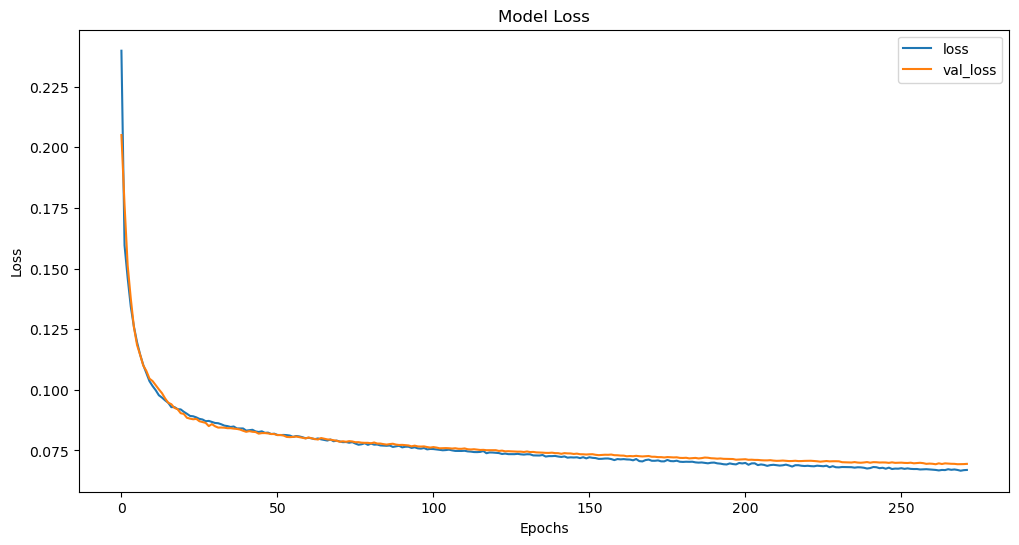

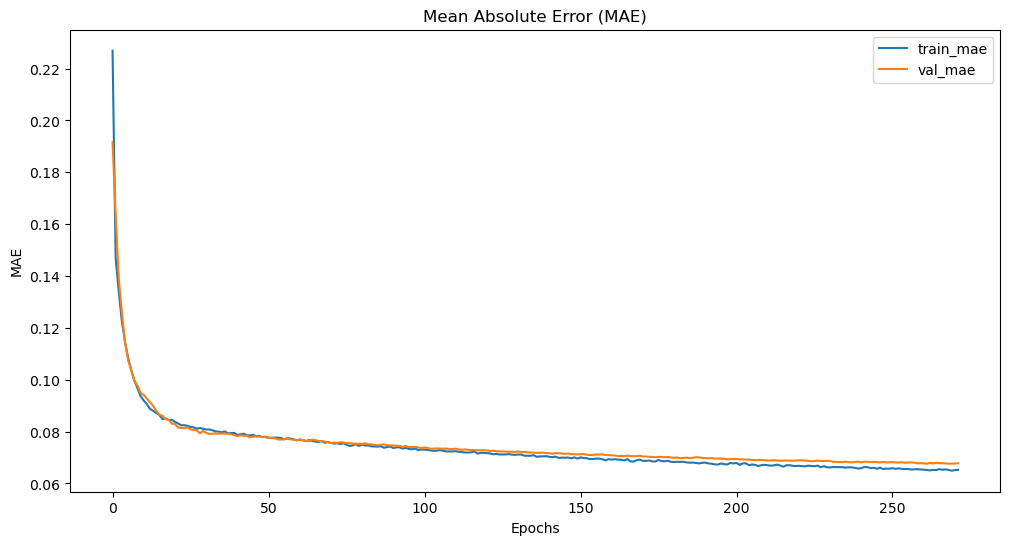

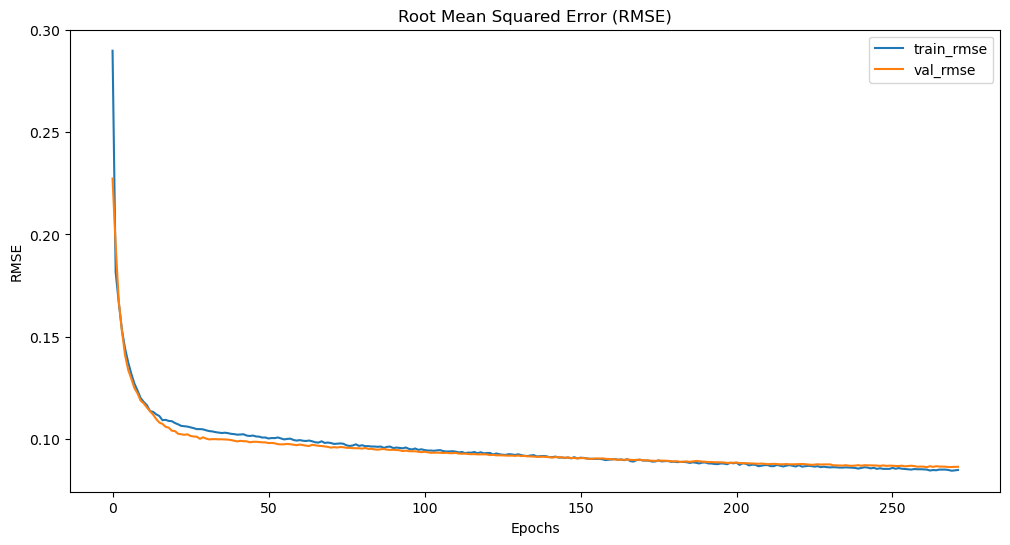

In [172]:
# Plot history for loss, MAE, and RMSE as before
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='train_mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('Mean Absolute Error (MAE)')
plt.show()

train_rmse = np.sqrt(history.history['mse'])
val_rmse = np.sqrt(history.history['val_mse'])
plt.figure(figsize=(12, 6))
plt.plot(train_rmse, label='train_rmse')
plt.plot(val_rmse, label='val_rmse')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.title('Root Mean Squared Error (RMSE)')
plt.show()

In [173]:
# Calculate MAPE manually, handling zero values
def safe_mape(y_true, y_pred, epsilon=1e-10):
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / (y_true[mask] + epsilon))) * 100

train_predictions = model.predict(train_X)
train_X_reshaped = train_X.reshape((train_X.shape[0], train_X.shape[2]))
# Invert scaling for forecast
inv_yhat = np.concatenate((train_X_reshaped,train_predictions), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:, -1]
# Invert scaling for actual
train_y_reshaped = train_y.reshape((len(train_y), 1))
inv_y = np.concatenate((train_X_reshaped, train_y_reshaped), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, -1]
# Calculate RMSE, MAE, MAPE
train_rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
train_mae = mean_absolute_error(inv_y, inv_yhat)
train_mape = np.mean(np.abs((inv_y - inv_yhat) / inv_y)) * 100


test_predictions = model.predict(test_X)
# Reshape test_X for inverse scaling
test_X_reshaped = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# Invert scaling for forecast
inv_yhat = np.concatenate((test_X_reshaped,test_predictions), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:, -1]
# Invert scaling for actual
test_y_reshaped = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_X_reshaped, test_y_reshaped), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, -1]
# Calculate RMSE, MAE, MAPE
test_rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
test_mae = mean_absolute_error(inv_y, inv_yhat)
test_mape = np.mean(np.abs((inv_y - inv_yhat) / inv_y)) * 100

print(f"Train RMSE: {train_rmse:.3f}")
print(f"Train MAE: {train_mae:.3f}")
print(f"Train MAPE: {train_mape:.3f}%")
print(f"\nTest RMSE: {test_rmse:.3f}")
print(f"Test MAE: {test_mae:.3f}")
print(f"Test MAPE: {test_mape:.3f}%")

510/510 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step
Train RMSE: 6.165
Train MAE: 4.715
Train MAPE: 6.547%

Test RMSE: 6.564
Test MAE: 5.154
Test MAPE: 8.317%


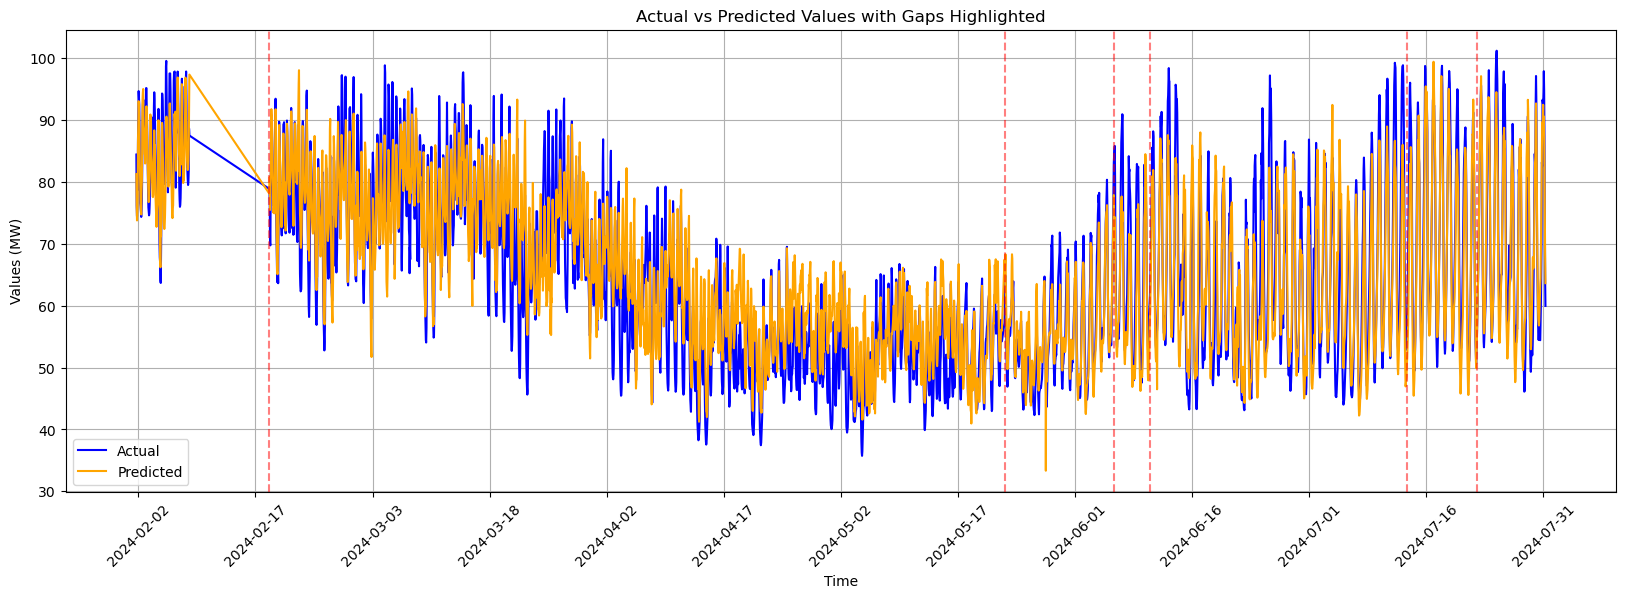

Gaps in data:
Gap Start: 2024-02-08 13:00:00
Gap ends at: 2024-02-18 12:00:00
Time Difference: 246.0 hours

Gap Start: 2024-05-22 15:00:00
Gap ends at: 2024-05-22 17:00:00
Time Difference: 8.0 hours

Gap Start: 2024-06-05 18:00:00
Gap ends at: 2024-06-05 17:00:00
Time Difference: 5.0 hours

Gap Start: 2024-06-10 12:00:00
Gap ends at: 2024-06-10 08:00:00
Time Difference: 2.0 hours

Gap Start: 2024-07-13 08:00:00
Gap ends at: 2024-07-13 05:00:00
Time Difference: 3.0 hours

Gap Start: 2024-07-22 09:00:00
Gap ends at: 2024-07-22 05:00:00
Time Difference: 2.0 hours



In [174]:
# Extract the test data with timestamps
test_df = LSTM_df.iloc[n_train_hours:, :].copy()
test_df['hour_begins'] = LSTM_df.iloc[n_train_hours:]['hour_begins']

# Identify gaps in the data
actual_vs_predicted = pd.DataFrame({
    'hour_begins': test_timestamps,
    'actual': inv_y,
    'predicted': inv_yhat
})

# Check for gaps in the timestamps (in days)
actual_vs_predicted['hour_begins_diff'] = actual_vs_predicted['hour_begins'].diff().dt.total_seconds() / 3600
gaps = actual_vs_predicted[actual_vs_predicted['hour_begins_diff'] > 1]

# Plot actual vs predicted values with gaps highlighted
plt.figure(figsize=(20, 6))
plt.plot(actual_vs_predicted['hour_begins'], actual_vs_predicted['actual'], label='Actual', color='blue')
plt.plot(actual_vs_predicted['hour_begins'], actual_vs_predicted['predicted'], label='Predicted', color='orange')
for gap_start in gaps['hour_begins']:
    plt.axvline(x=gap_start, color='red', linestyle='--', alpha=0.5)
plt.title('Actual vs Predicted Values with Gaps Highlighted')
plt.xlabel('Time')
plt.ylabel('Values (MW)')
plt.legend()
plt.grid(True)

# Set date format on x-axis every 15 days
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
plt.show()

# Print the gaps and their nearest significant time differences
print("Gaps in data:")
for index, row in gaps.iterrows():
    previous_timestamp = row['hour_begins'] - pd.Timedelta(hours=row['hour_begins_diff'])

    previous_row = actual_vs_predicted[actual_vs_predicted['hour_begins'] == previous_timestamp]

    gap_start = previous_row['hour_begins'].values[0] if not previous_row.empty else 'N/A'
    gap_end = row['hour_begins']

    print(f"Gap Start: {pd.to_datetime(gap_start).strftime('%Y-%m-%d %H:%M:%S') if gap_start != 'N/A' else 'N/A'}")
    print(f"Gap ends at: {gap_end.strftime('%Y-%m-%d %H:%M:%S')}")
    print(f"Time Difference: {row['hour_begins_diff']} hours\n")

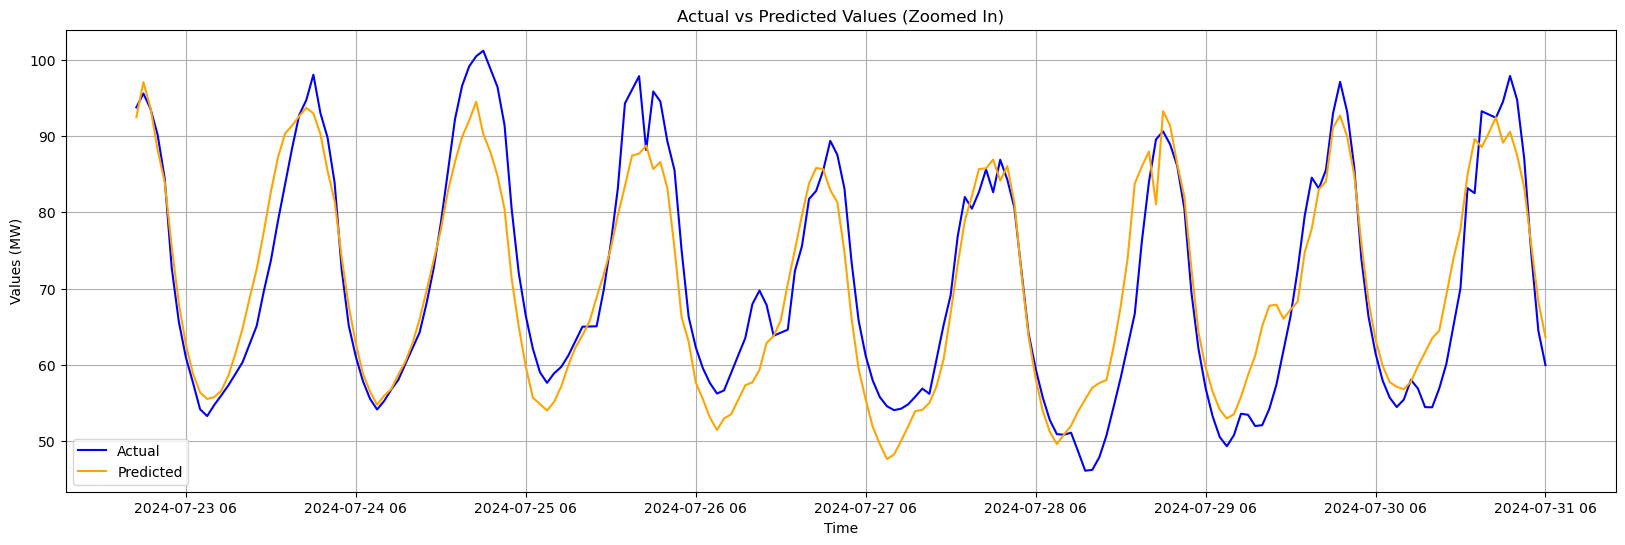

In [175]:
import matplotlib.dates as mdates

# Zoom in to plot
plt.figure(figsize=(20, 6))
plt.plot(test_timestamps[-200:], inv_y[-200:], label='Actual', color='blue')
plt.plot(test_timestamps[-200:], inv_yhat[-200:], label='Predicted', color='orange')
# Format the x-axis to show the full datetime
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H'))
plt.title('Actual vs Predicted Values (Zoomed In)')
plt.xlabel('Time')
plt.ylabel('Values (MW)')
plt.legend()
plt.grid(True)
plt.show()

In [58]:
from keras.optimizers import Adam, SGD
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from math import sqrt
# Suppress warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='keras')

# Function to create the LSTM model
def create_model(units=50, learning_rate=0.001):
    optimizer = Adam(learning_rate=learning_rate)
        
    model = Sequential()
    model.add(LSTM(units, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer=optimizer)
    return model

# Function to evaluate model performance
def evaluate_model(train_X, train_y, test_X, test_y, units, batch_size, epochs, learning_rate):
    model = create_model(units, learning_rate)
    model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, verbose=0, shuffle=False, validation_data=(test_X, test_y))
    
    # Make predictions
    yhat = model.predict(test_X)
    test_X_reshaped = test_X.reshape((test_X.shape[0], test_X.shape[2]))
    
    # Invert scaling for forecast
    inv_yhat = np.concatenate((yhat, test_X_reshaped), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,0]
    
    # Invert scaling for actual
    test_y_reshaped = test_y.reshape((len(test_y), 1))
    inv_y = np.concatenate((test_y_reshaped, test_X_reshaped), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,0]
    
    # Calculate RMSE and MAE
    rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
    mae = mean_absolute_error(inv_y, inv_yhat)
    mape = np.mean(np.abs((inv_y - inv_yhat) / inv_y)) * 100
    
    return inv_y, inv_yhat, rmse, mae, mape

# Function to search for the best hyperparameters
def search_best_hyperparameters():
    # Define hyperparameters to test
    units_list = [50, 100, 150]
    batch_size_list = [32, 64, 72]
    epochs_list = [40, 60, 80]
    learning_rate_list = [0.001, 0.01, 0.1]

    results = []

   # Calculate total iterations for tqdm progress bar
    total_iterations = len(units_list) * len(batch_size_list) * len(epochs_list) * len(learning_rate_list)
    
    # Manually test different hyperparameters with tqdm progress bar
    with tqdm(total=total_iterations, desc="Hyperparameter Search") as pbar:
        for i, (units, batch_size, epochs, learning_rate) in enumerate(
            (u, b, e, l) 
            for u in units_list 
            for b in batch_size_list 
            for e in epochs_list 
            for l in learning_rate_list
        ):
            inv_y, inv_yhat, rmse, mae, mape = evaluate_model(train_X, train_y, test_X, test_y, units, batch_size, epochs, learning_rate)
            results.append((units, batch_size, epochs, learning_rate, rmse, mae, mape))
            if i % (total_iterations // 5) == 0:  # Update every 5%
                pbar.update(5)
    
    return inv_y, inv_yhat, results

In [59]:
# Search for the best hyperparameters
inv_y, inv_yhat,results = search_best_hyperparameters()

Hyperparameter Search:   0%|          | 0/81 [00:00<?, ?it/s]

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step


Hyperparameter Search:   6%|▌         | 5/81 [00:16<04:11,  3.31s/it]

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Hyperparameter Search:  12%|█▏        | 10/81 [05:58<49:11, 41.57s/it]

153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Hyperparameter Search:  19%|█▊        | 15/81 [18:41<1:41:30, 92.28s/it]

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Hyperparameter Search:  25%|██▍       | 20/81 [26:46<1:35:41, 94.12s/it]

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Hyperparameter Search:  31%|███       | 25/81 [34:40<1:28:05, 94.39s/it]

153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Hyperparameter Search:  37%|███▋      | 30/81 [49:42<1:24:30, 99.43s/it] 


In [74]:
# Function to train and plot the best model
def train_and_plot_best_model(results, train_X, train_y, test_X, test_y, metric='mae'):
    if metric == 'mae':
        best_result = min(results, key=lambda x: x[5])  # Sort by MAE
    elif metric == 'rmse':
        best_result = min(results, key=lambda x: x[4])  # Sort by RMSE
    elif metric == 'mape':
        best_result = min(results, key=lambda x: x[6])  # Sort by MAPE
    else:
        raise ValueError("Unsupported metric. Use 'mae' or 'rmse' or 'mape'")
    
    print(f"Best hyperparameters: units={best_result[0]}, batch_size={best_result[1]},  epochs={best_result[2]}, learning_rate={best_result[3]}")
    print(f"Best RMSE={best_result[4]}, Best MAE={best_result[5]}, Best MAPE={best_result[6]}")

    best_units, best_batch_size, best_epochs, best_learning_rate = best_result[:4]
    model = create_model(best_units, best_learning_rate)
    history = model.fit(train_X, train_y, epochs=best_epochs, batch_size=best_batch_size, validation_data=(test_X, test_y), verbose=0, shuffle=False)

    # Plot history
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.show()

    # Make final prediction and plot results
    yhat = model.predict(test_X, verbose=0)
    test_X_reshaped = test_X.reshape((test_X.shape[0], test_X.shape[2]))

    # Invert scaling for forecast
    inv_yhat = np.concatenate((yhat, test_X_reshaped), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:, 0]

    # Invert scaling for actual
    test_y = test_y.reshape((len(test_y), 1))
    inv_y = np.concatenate((test_y, test_X_reshaped), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:, 0]

    # Plot the actual vs predicted values
    plt.figure(figsize=(20, 6))
    plt.plot(test_timestamps, inv_y, label='Actual', color='blue')
    plt.plot(test_timestamps,inv_yhat, label='Predicted', color='orange')
    plt.title('Actual vs Predicted Values')
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)
    # Set date format on x-axis every 15 days
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    
    plt.xticks(rotation=45)
    plt.show()
    
    # Zoom in to plot
    plt.figure(figsize=(20, 6))
    plt.plot(test_timestamps[-100:], inv_y[-100:], label='Actual', color='blue')
    plt.plot(test_timestamps[-100:], inv_yhat[-100:], label='Predicted', color='orange')
    plt.title('Actual vs Predicted Values (Zoomed In)')
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)
    # Set date format on x-axis every 10 days
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    
    plt.xticks(rotation=45)
    # Set date format on x-axis every 1 days
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    
    plt.xticks(rotation=45)
    plt.show()

Training and plotting best model based on MAE:
Best hyperparameters: units=100, batch_size=32,  epochs=60, learning_rate=0.001
Best RMSE=5.715135324773299, Best MAE=4.5071891730013105, Best MAPE=6.190342876159309


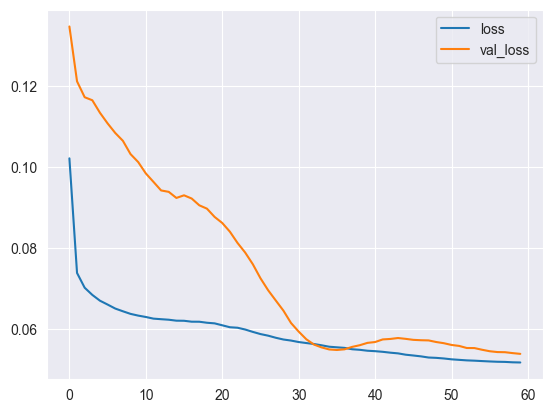

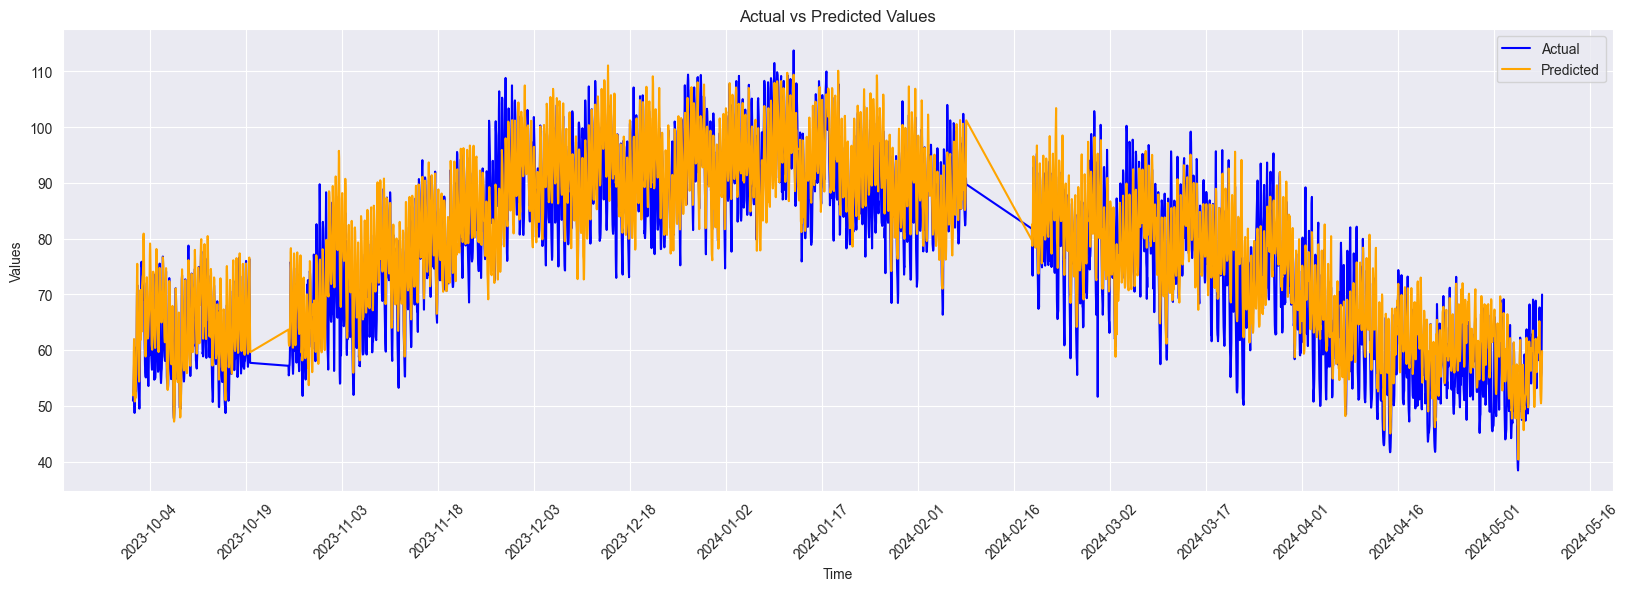

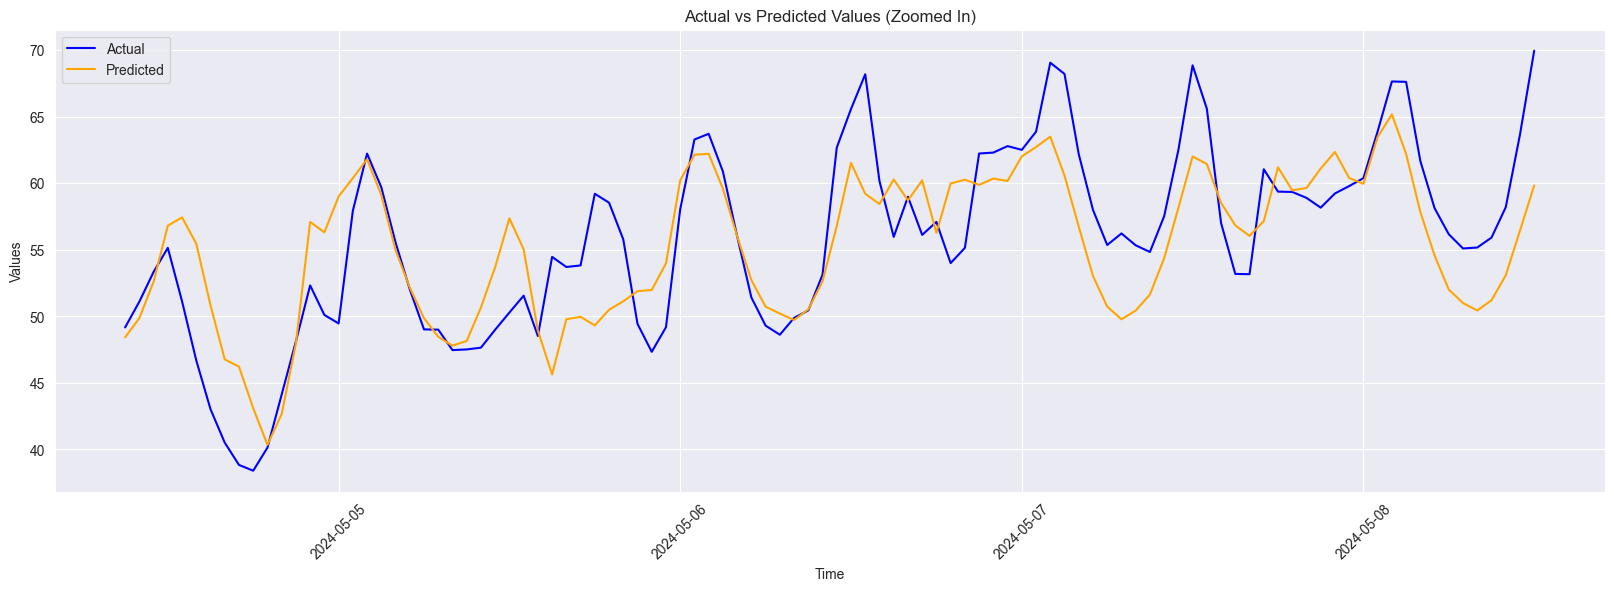

Training and plotting best model based on RMSE:
Best hyperparameters: units=100, batch_size=32,  epochs=60, learning_rate=0.001
Best RMSE=5.715135324773299, Best MAE=4.5071891730013105, Best MAPE=6.190342876159309


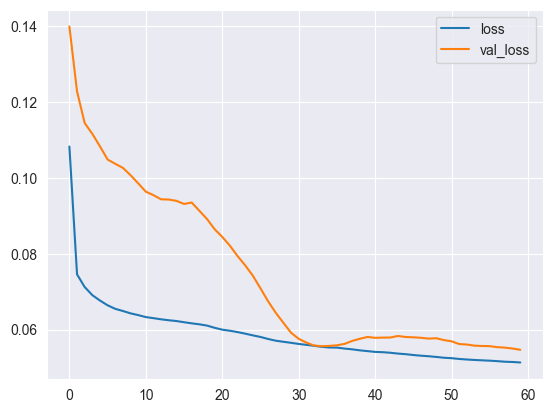

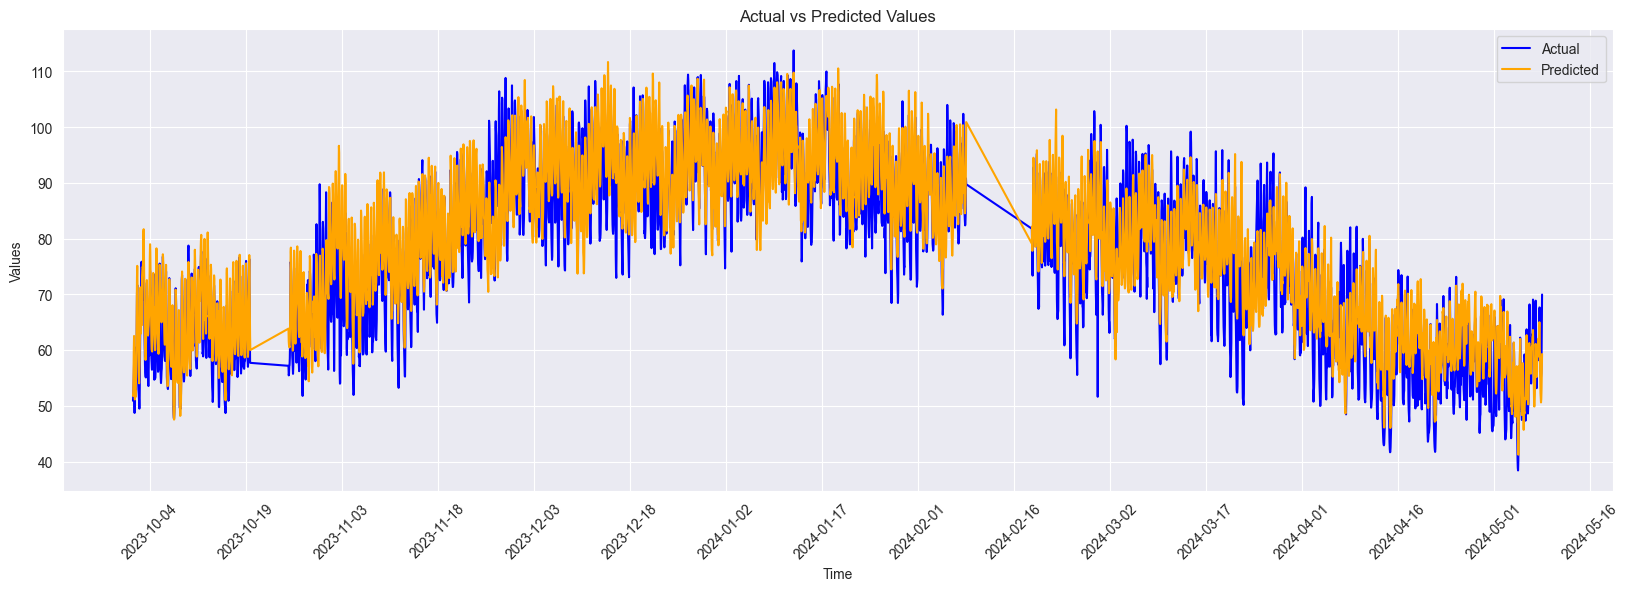

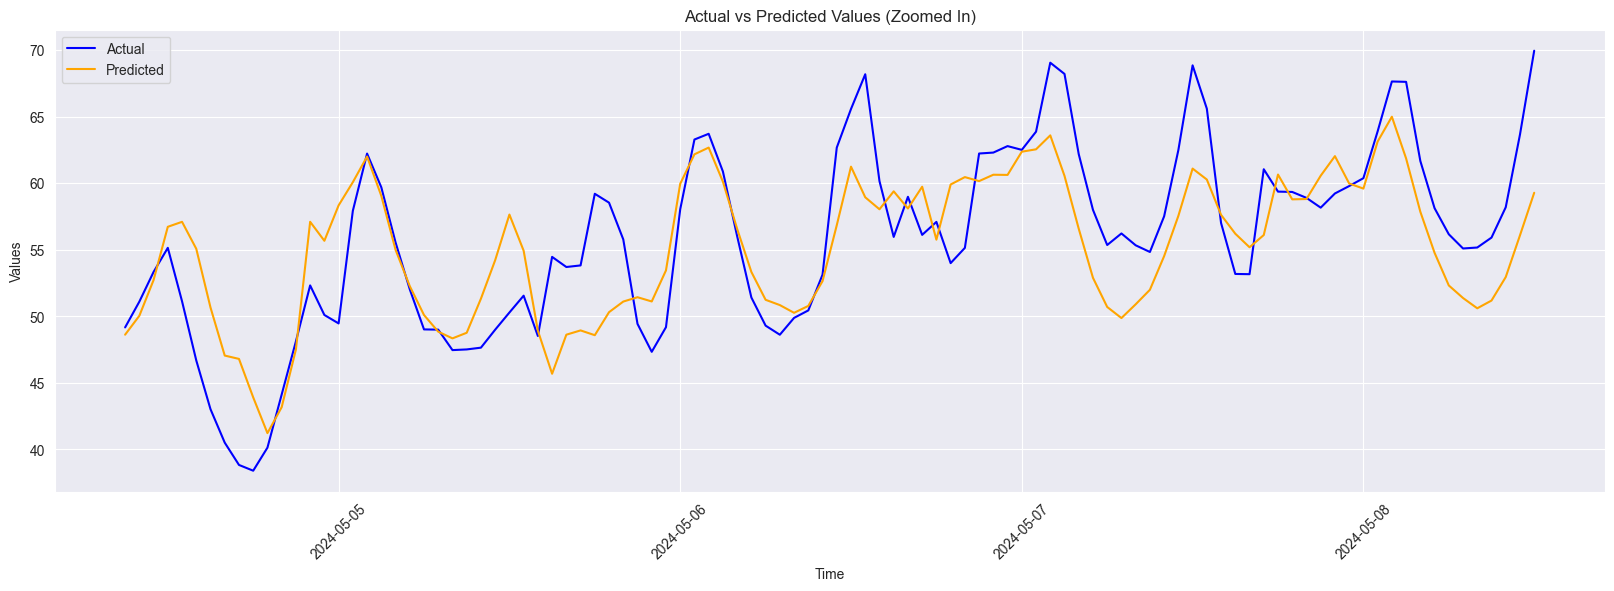

Training and plotting best model based on MAPE:
Best hyperparameters: units=50, batch_size=32,  epochs=40, learning_rate=0.001
Best RMSE=5.740096595451922, Best MAE=4.511611207690109, Best MAPE=6.132246997774155


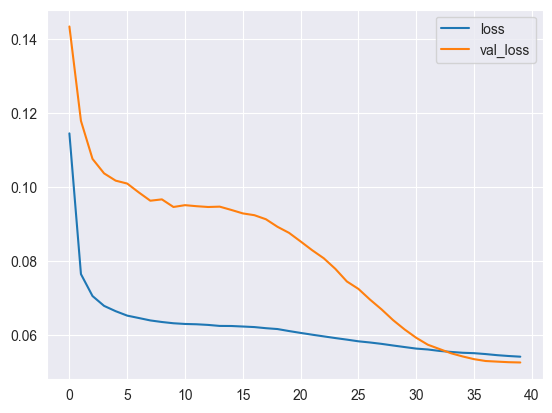

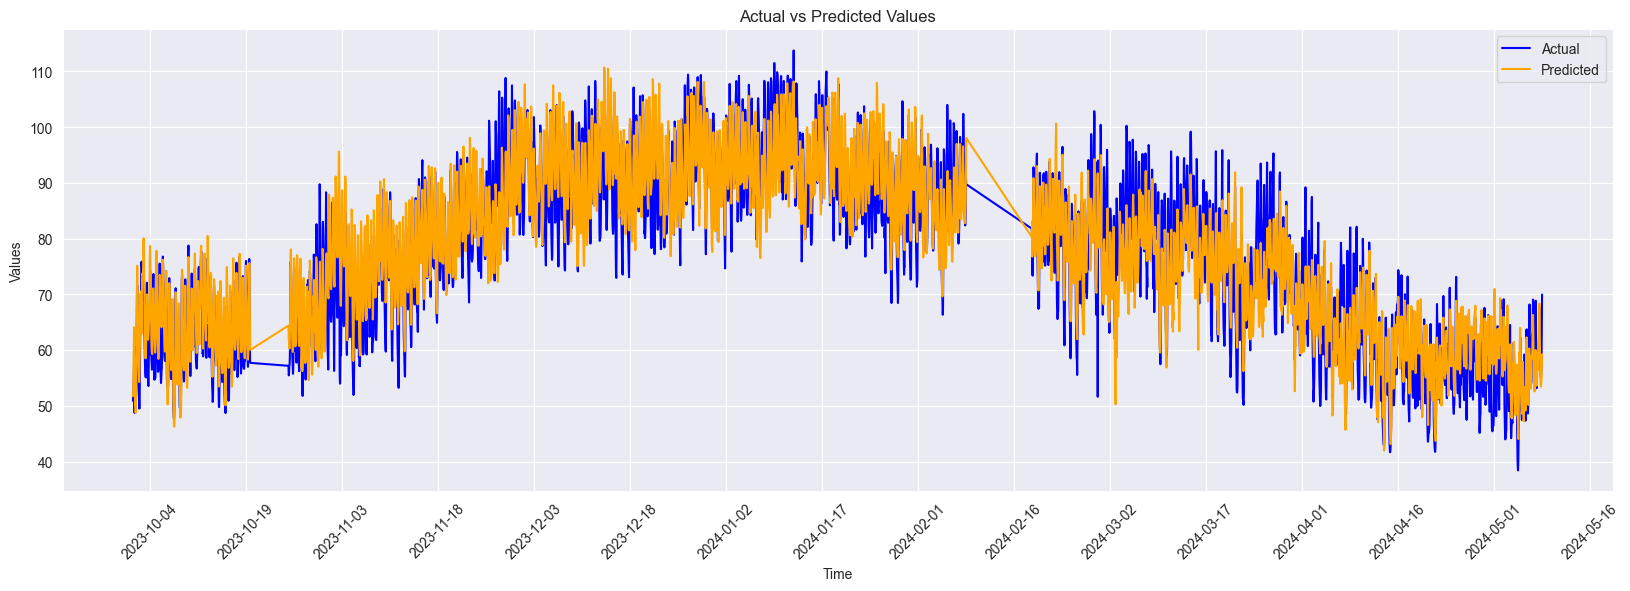

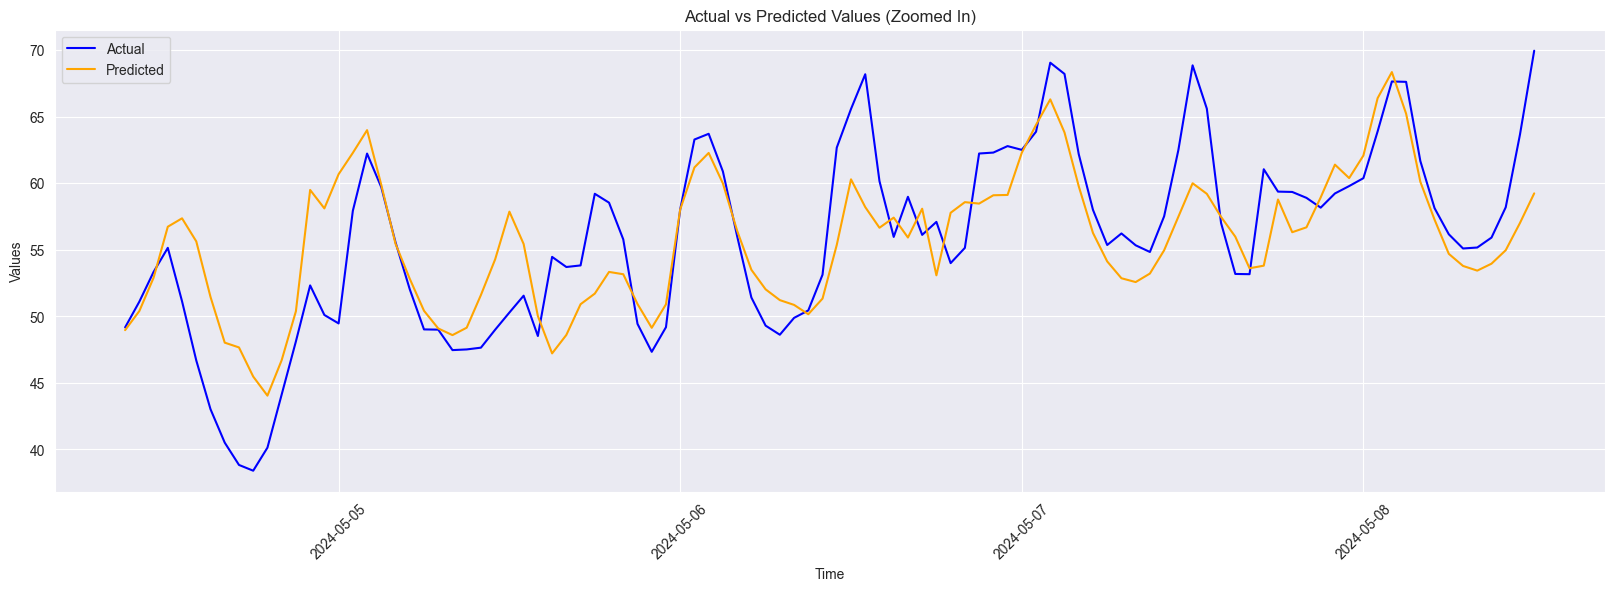

In [75]:
# Train and plot best model based on MAE
print("Training and plotting best model based on MAE:")
best_mae_result = train_and_plot_best_model(results, train_X, train_y, test_X, test_y, metric='mae')

# Train and plot best model based on RMSE
print("Training and plotting best model based on RMSE:")
best_rmse_result = train_and_plot_best_model(results, train_X, train_y, test_X, test_y, metric='rmse')

# Train and plot best model based on MAPE
print("Training and plotting best model based on MAPE:")
best_mape_result = train_and_plot_best_model(results, train_X, train_y, test_X, test_y, metric='mape')

## use keras_tuner to fine-tune

In [76]:
# Normalize the data and convert to time series data
from sklearn.preprocessing import MinMaxScaler

df_merged['timestamp'] = pd.to_datetime(df_merged['timestamp'].dt.tz_convert('US/Mountain'))
df_merged = df_merged.sort_values(by = 'timestamp')
# features and target
df_model = df_merged[['gross_load_replaced', 'gross_load_replaced_3d', 'month_sin', 'month_cos',
       'day_sin', 'day_cos', 'hour_sin', 'hour_cos', 'dow_sin', 'dow_cos', 'temperature', 'solar_radiation', 'cloud_cover', 'humidity',
       'wind_speed']]


features = ['gross_load_replaced_3d', 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'hour_sin', 'hour_cos', 'dow_sin', 'dow_cos', 'temperature', 'solar_radiation', 'cloud_cover', 'humidity','wind_speed']
features_to_scale = ['gross_load_replaced_3d', 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'hour_sin', 'hour_cos', 'dow_sin', 'dow_cos', 'temperature', 'solar_radiation', 'cloud_cover', 'humidity','wind_speed']
target_column = ['gross_load_replaced']
#non_scaled_features = ['is_holiday']

columns_to_scale = features_to_scale + target_column

# Scale the feature columns and target column
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_df = scaler.fit_transform(df_model[columns_to_scale])
LSTM_df = pd.DataFrame(scaled_df, columns=columns_to_scale, index=df_model.index)
LSTM_df

,gross_load_replaced_3d,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,dow_sin,dow_cos,temperature,solar_radiation,cloud_cover,humidity,wind_speed,gross_load_replaced
73,0.270997,0.5,1.0,0.050521,0.277951,0.066987,0.750000,0.000000,0.356896,0.320563,0.257023,0.500268,0.441337,0.039796,0.565371
74,0.610973,0.5,1.0,0.050521,0.277951,0.146447,0.853553,0.000000,0.356896,0.321561,0.463028,0.126753,0.409061,0.008701,0.550908
75,0.638824,0.5,1.0,0.050521,0.277951,0.250000,0.933013,0.000000,0.356896,0.322607,0.350211,0.019385,0.388261,0.033653,0.553307
76,0.687832,0.5,1.0,0.050521,0.277951,0.370590,0.982963,0.000000,0.356896,0.322655,0.193267,0.003273,0.350356,0.129865,0.587788
77,0.768096,0.5,1.0,0.015339,0.373065,0.500000,1.000000,0.099031,0.801938,0.321121,0.026591,0.000000,0.352669,0.114282,0.678449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20858,0.292012,0.5,0.0,0.399221,0.989739,0.982963,0.370590,1.000000,0.356896,0.340667,0.000000,0.000000,0.097673,0.298747,0.352399
20859,0.259310,0.5,0.0,0.399221,0.989739,0.933013,0.250000,1.000000,0.356896,0.339580,0.000000,0.000000,0.097212,0.294748,0.340929
20860,0.234447,0.5,0.0,0.399221,0.989739,0.853553,0.146447,1.000000,0.356896,0.338643,0.000000,0.000000,0.102409,0.247467,0.295365
20861,0.225927,0.5,0.0,0.399221,0.989739,0.750000,0.066987,1.000000,0.356896,0.336531,0.000000,0.000000,0.131287,0.248050,0.308721


In [258]:
# split into train and test sets
values = LSTM_df.values
n_train_hours = 365 * 36
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]  # x: All columns except the last,  y: The last column
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [number of samples, timesteps, Number of features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(13140, 1, 14) (13140,) (6897, 1, 14) (6897,)


In [259]:
import shutil

# Delete the previous tuner directory
shutil.rmtree('hyperparameter_tuning/lstm_tuning', ignore_errors=True)

In [260]:
from keras_tuner import RandomSearch, GridSearch
from keras_tuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt



# Function to create the LSTM model
def create_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=50, max_value=150, step=50),
                   input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(1))

    if optimizer == 'adam':
        optimizer = Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.01, 0.1]))
    elif optimizer == 'sgd':
        optimizer = SGD(learning_rate=hp.Choice('learning_rate', [0.001, 0.01, 0.1]))

    model.compile(loss='mape', optimizer='adam', metrics=['mape'])

    return model

# Define the tuner
tuner = GridSearch(
    create_model,
    objective='val_loss',
    max_trials=80,
    executions_per_trial=1,
    directory='hyperparameter_tuning',
    project_name='lstm_tuning'
)

# # Add batch_size to the search space
tuner.search_space_summary()


# Define early stopping and reduce learning rate on plateau callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=15, min_lr=1e-5)

# Conduct the search
tuner.search(train_X, train_y,
             epochs=HyperParameters().Int('epochs', min_value=30, max_value=100, step=20),
             batch_size=HyperParameters().Int('batch_size', min_value=16, max_value=64, step=16),
             validation_data=(test_X, test_y),
             callbacks=[early_stopping, reduce_lr],
             verbose=2)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"\nBest hyperparameters:")
for key, value in best_hps.values.items():
    print(f"{key}: {value}")

Trial 54 Complete [00h 00m 27s]
val_loss: 1367918208.0

Best val_loss So Far: 13.883155822753906
Total elapsed time: 00h 16m 00s

Best hyperparameters:
units: 100
dropout: 0.4
optimizer: adam
learning_rate: 0.001


In [263]:
best_epochs = best_hps.Int('epochs', min_value=10, max_value=100, step=20)
best_batch_size = best_hps.Int('batch_size', min_value=32, max_value=72, step=32)
print(f"Best epochs: {best_epochs}, Best batch size: {best_batch_size}")

Best epochs: 10, Best batch size: 32


Epoch 1/50
411/411 - 2s - 6ms/step - loss: 25250.7031 - mape: 25250.7031 - val_loss: 14.9419 - val_mape: 14.9419 - learning_rate: 0.0010
Epoch 2/50
411/411 - 1s - 1ms/step - loss: 22896.5234 - mape: 22896.5234 - val_loss: 14.8724 - val_mape: 14.8724 - learning_rate: 0.0010
Epoch 3/50
411/411 - 0s - 1ms/step - loss: 27113.9629 - mape: 27113.9629 - val_loss: 22.3324 - val_mape: 22.3324 - learning_rate: 0.0010
Epoch 4/50
411/411 - 1s - 1ms/step - loss: 1481.4336 - mape: 1481.4336 - val_loss: 27.0284 - val_mape: 27.0284 - learning_rate: 0.0010
Epoch 5/50
411/411 - 1s - 1ms/step - loss: 12974.8711 - mape: 12974.8711 - val_loss: 45.1224 - val_mape: 45.1224 - learning_rate: 0.0010
Epoch 6/50
411/411 - 1s - 2ms/step - loss: 54503.2227 - mape: 54503.2227 - val_loss: 26.8600 - val_mape: 26.8600 - learning_rate: 0.0010
Epoch 7/50
411/411 - 1s - 2ms/step - loss: 50167.4570 - mape: 50167.4570 - val_loss: 18.2636 - val_mape: 18.2636 - learning_rate: 0.0010


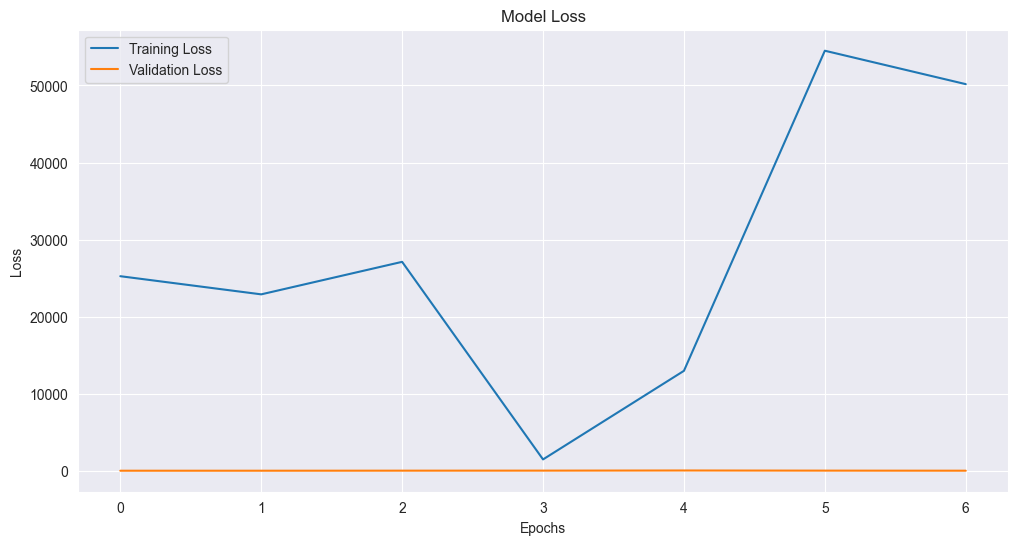

216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step
RMSE: 7.497847291300725, MAE: 5.844048972125491, MAPE: 8.175094279377848


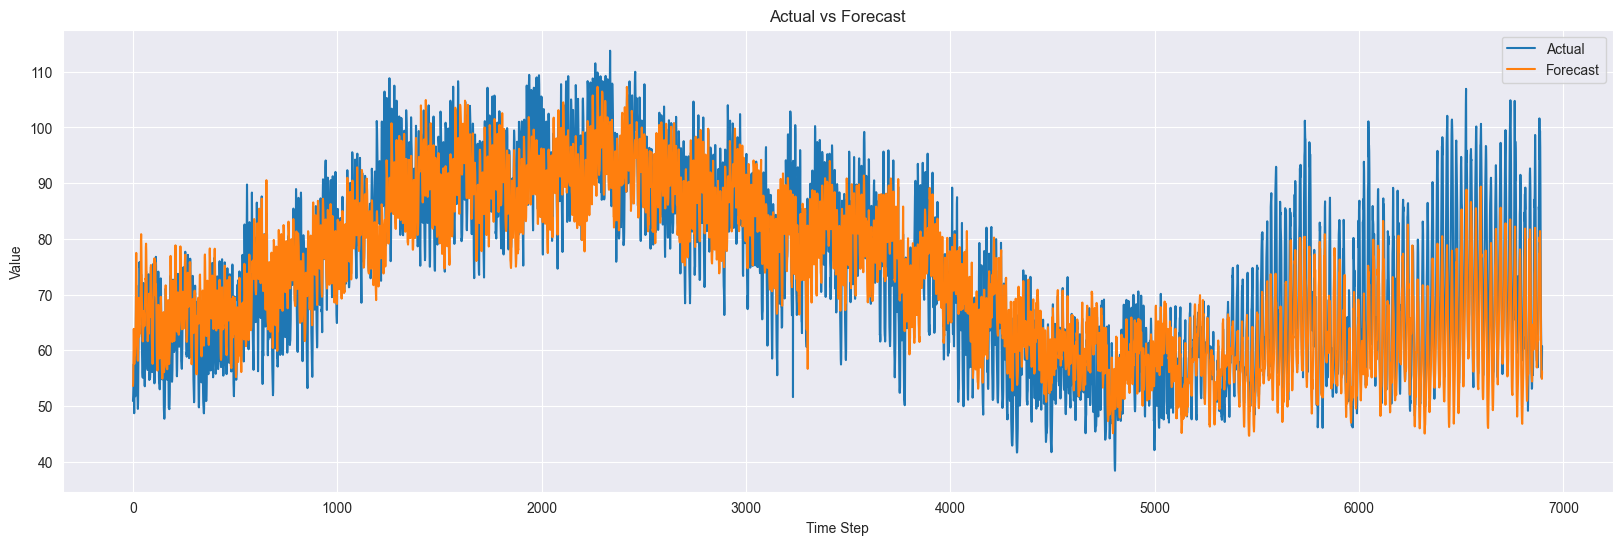

In [264]:
# Build the model with the best hyperparameters and train it
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_X, train_y,
                    epochs= 50, # best_hps.Int('epochs', min_value=10, max_value=100, step=20),
                    batch_size= 32, #best_hps.Int('batch_size', min_value=32, max_value=72, step=32),
                    validation_data=(test_X, test_y),
                    callbacks=[early_stopping, reduce_lr],
                    verbose=2)

# Plot the loss history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Evaluate the model
yhat = model.predict(test_X)
test_X_reshaped = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# Invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X_reshaped), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:, 0]

# Invert scaling for actual
test_y_reshaped = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y_reshaped, test_X_reshaped), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]

# Calculate RMSE, MAE, MAPE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
mae = mean_absolute_error(inv_y, inv_yhat)
mape = np.mean(np.abs((inv_y - inv_yhat) / inv_y)) * 100

print(f'RMSE: {rmse}, MAE: {mae}, MAPE: {mape}')

# Plot prediction vs actual
plt.figure(figsize=(20, 6))
plt.plot(inv_y, label='Actual')
plt.plot(inv_yhat, label='Forecast')
plt.title('Actual vs Forecast')
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()

In [112]:
# Function to create the LSTM model
def create_model(hp):
    model = Sequential()

    # Adding multiple LSTM layers with tunable units
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(LSTM(units=hp.Int(f'units_{i}', min_value=50, max_value=150, step=50),
                       return_sequences=True if i < hp.Int('num_layers', 1, 3) - 1 else False,
                       input_shape=(train_X.shape[1], train_X.shape[2]) if i == 0 else None))
        model.add(Dropout(hp.Float(f'dropout_{i}', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Dense(1))

    optimizer = hp.Choice('optimizer', ['adam', 'sgd'])
    if optimizer == 'adam':
        optimizer = Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.01, 0.1]))
    elif optimizer == 'sgd':
        optimizer = SGD(learning_rate=hp.Choice('learning_rate', [0.001, 0.01, 0.1]))

    model.compile(loss='mae', optimizer=optimizer, metrics=['mae'])
    return model

# Define the tuner
tuner = RandomSearch(
    create_model,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=1,
    directory='hyperparameter_tuning',
    project_name='lstm_tuning'
)

# Add batch_size to the search space
hp = HyperParameters()
hp.Int('batch_size', min_value=32, max_value=72, step=32)

# Define early stopping and reduce learning rate on plateau callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-5)

# Conduct the search
tuner.search(train_X, train_y,
             epochs=50,
             batch_size=hp.Int('batch_size', min_value=32, max_value=72, step=32),
             validation_data=(test_X, test_y),
             callbacks=[early_stopping, reduce_lr],
             verbose=2)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


Reloading Tuner from hyperparameter_tuning\lstm_tuning\tuner0.json


In [ ]:
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Function to create the LSTM model
def create_model(hp):
    model = Sequential()

    # Adding multiple LSTM layers with tunable units
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(LSTM(units=hp.Int(f'units_{i}', min_value=50, max_value=150, step=50),
                       return_sequences=True if i < hp.Int('num_layers', 1, 3) - 1 else False,
                       input_shape=(train_X.shape[1], train_X.shape[2]) if i == 0 else None))
        model.add(Dropout(hp.Float(f'dropout_{i}', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Dense(1))

    optimizer = hp.Choice('optimizer', ['adam', 'sgd'])
    if optimizer == 'adam':
        optimizer = Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.01, 0.1]))
    elif optimizer == 'sgd':
        optimizer = SGD(learning_rate=hp.Choice('learning_rate', [0.001, 0.01, 0.1]))

    model.compile(loss='mae', optimizer=optimizer, metrics=['mae'])
    return model

# Define the tuner
tuner = RandomSearch(
    create_model,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=1,
    directory='hyperparameter_tuning',
    project_name='lstm_tuning'
)

# Add batch_size to the search space
hp = HyperParameters()
hp.Int('batch_size', min_value=32, max_value=72, step=32)

# Define early stopping and reduce learning rate on plateau callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-5)

# Conduct the search
tuner.search(train_X, train_y,
             epochs=50,
             batch_size=hp.Int('batch_size', min_value=32, max_value=72, step=32),
             validation_data=(test_X, test_y),
             callbacks=[early_stopping, reduce_lr],
             verbose=2)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters and train it
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_X, train_y,
                    epochs=50,
                    batch_size=best_hps.get('batch_size'),
                    validation_data=(test_X, test_y),
                    callbacks=[early_stopping, reduce_lr],
                    verbose=2)

# Evaluate the model
yhat = model.predict(test_X)
test_X_reshaped = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# Invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X_reshaped), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:, 0]

# Invert scaling for actual
test_y_reshaped = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y_reshaped, test_X_reshaped), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]

# Calculate RMSE, MAE, MAPE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
mae = mean_absolute_error(inv_y, inv_yhat)
mape = np.mean(np.abs((inv_y - inv_yhat) / inv_y)) * 100

print(f'RMSE: {rmse}, MAE: {mae}, MAPE: {mape}')
